## Library

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

warnings.filterwarnings(action="ignore")

DATA_PATH = "/kaggle/input/coupon-purchase-prediction/"

## EDA
* coupon_detail_train/test.csv 쿠폰 구매 정보  
  ITEM_COUNT: 쿠폰 개수  
  I_DATE: 구매일자  
  SMALL_AREA_NAME: 지역 정보  
  PURCHASEID_hash: 구매 해시값(PK)  
  USER_ID_hash: 유저 해시값  
  COUPON_ID_hash: 쿠폰 해시값  
    
* coupon_list_train/test.csv 모든 쿠폰 정보  
  CAPSULE_TEXT: 장르  
  GENRE_NAME: 장르  
  PRICE_RATE: 원가 대비 할인율  
  CATALOG_PRICE: 원가  
  DISCOUNT_PRICE: 할인되는 금액  
  DISPFROM: 게시 시작날짜  
  DISPEND: 게시 종료날짜  
  DISPPERIOD: 게시기간  
  VALIDFROM: 사용가능 시작날짜  
  VALIDEND: 사용가능 종료날짜  
  VALIDPERIOD: 사용가능 기간  
  USABLE_DATE_MON: 월요일 사용가능 여부  
  USABLE_DATE_TUE: 화요일 사용가능 여부  
  USABLE_DATE_WED: 수요일 사용가능 여부  
  USABLE_DATE_THU: 목요일 사용가능 여부  
  USABLE_DATE_FRI: 금요일 사용가능 여부  
  USABLE_DATE_SAT: 토요일 사용가능 여부  
  USABLE_DATE_SUN: 일요일 사용가능 여부  
  USABLE_DATE_HOLIDAY: 공휴일 사용가능 여부  
  USABLE_DATE_BEFORE_HOLIDAY: 공휴일 외 사용가능 여부  
  large_area_name: 사용가능 지역  
  ken_name  
  small_area_name  
  COUPON_ID_hash: 쿠폰 해시값(PK)  
    
* user_list.csv 회원 정보  
  REG_DATE: 등록일자  
  SEX_ID: 성별  
  AGE: 나이  
  WITHDRAW_DATE: 탈퇴일자  
  PREF_NAME: 선호지역  
  USER_ID_hash: 유저 해시값(PK)  
    
* coupon_visit_train/test.csv 사용자의 웹사이트 방문, 구매 기록  
  PURCHASE_FLG: 구매여부  
  I_DATE: 방문일시  
  PAGE_SERIAL: 방문 페이지 번호  
  REFERRER_hash: 방문 참조값 해시값 (방문전 링크값인거 같은데 활용 어떻게 할지 잘 모르겠음)  
  VIEW_COUPON_ID_hash: 확인한 쿠폰값 해시값  
  USER_ID_hash: 유저 해시값  
  SESSION_ID_hash: 세션 해시값  
  PURCHASEID_hash: 구매 해시값  

### data overview

In [2]:
with zipfile.ZipFile(DATA_PATH + "coupon_detail_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_detail = pd.read_csv(file)

# 결과 확인
df_detail.info()

압축 안의 파일: ['coupon_detail_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [3]:
df_detail.head(1).T

,0
ITEM_COUNT,1
I_DATE,2012-03-28 15:06:06
SMALL_AREA_NAME,兵庫
PURCHASEID_hash,c820a8882374a4e472f0984a8825893f
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a


In [4]:
with zipfile.ZipFile(DATA_PATH + "coupon_list_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_list = pd.read_csv(file)

# 결과 확인
df_list.info()


압축 안의 파일: ['coupon_list_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64


In [5]:
df_list.head(1).T

,0
CAPSULE_TEXT,グルメ
GENRE_NAME,グルメ
PRICE_RATE,50
CATALOG_PRICE,3000
DISCOUNT_PRICE,1500
DISPFROM,2011-07-08 12:00:00
DISPEND,2011-07-09 12:00:00
DISPPERIOD,1
VALIDFROM,2011-07-10
VALIDEND,2011-12-08


In [6]:
with zipfile.ZipFile(DATA_PATH + "coupon_visit_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_visit = pd.read_csv(file)

# 결과 확인
df_visit.info()

압축 안의 파일: ['coupon_visit_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [7]:
df_visit.head(1).T

,0
PURCHASE_FLG,0
I_DATE,2012-03-28 14:15:00
PAGE_SERIAL,7
REFERRER_hash,7d3892e54acb559ae36c459978489330
VIEW_COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
SESSION_ID_hash,673af822615593249e7c6a9a1a6bbb1a
PURCHASEID_hash,NaN


In [8]:
with zipfile.ZipFile(DATA_PATH + "user_list.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_user = pd.read_csv(file)

# 결과 확인
df_user.info()

압축 안의 파일: ['user_list.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [9]:
df_user.head(1).T

,0
REG_DATE,2012-03-28 14:14:18
SEX_ID,f
AGE,25
WITHDRAW_DATE,NaN
PREF_NAME,NaN
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb


### 결측치 확인

In [10]:
print(f"<구매정보>\n{df_detail.isnull().sum()}\n")
print(f"<전체쿠폰정보>\n{df_list.isnull().sum()}\n")
print(f"<유저방문정보>\n{df_visit.isnull().sum()}\n")
print(f"<고객정보>\n{df_user.isnull().sum()}\n")

<구매정보>
ITEM_COUNT         0
I_DATE             0
SMALL_AREA_NAME    0
PURCHASEID_hash    0
USER_ID_hash       0
COUPON_ID_hash     0
dtype: int64

<전체쿠폰정보>
CAPSULE_TEXT                     0
GENRE_NAME                       0
PRICE_RATE                       0
CATALOG_PRICE                    0
DISCOUNT_PRICE                   0
DISPFROM                         0
DISPEND                          0
DISPPERIOD                       0
VALIDFROM                     6147
VALIDEND                      6147
VALIDPERIOD                   6147
USABLE_DATE_MON               7005
USABLE_DATE_TUE               7005
USABLE_DATE_WED               7005
USABLE_DATE_THU               7005
USABLE_DATE_FRI               7005
USABLE_DATE_SAT               7005
USABLE_DATE_SUN               7005
USABLE_DATE_HOLIDAY           7005
USABLE_DATE_BEFORE_HOLIDAY    7005
large_area_name                  0
ken_name                         0
small_area_name                  0
COUPON_ID_hash                   0
dtyp

In [11]:
print(df_detail.shape)
print(df_list.shape)
print(df_visit.shape)
print(df_user.shape)

(168996, 6)
(19413, 24)
(2833180, 8)
(22873, 6)


## Preprocessing

In [12]:
df_detail['I_DATE'] = pd.to_datetime(df_detail['I_DATE'])
df_detail['I_MONTH'] = df_detail['I_DATE'].dt.month
df_detail['I_DATE'] = df_detail['I_DATE'].dt.date

In [13]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
 6   I_MONTH          168996 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 8.4+ MB


In [14]:
df_list['PURCHASE_PRICE'] = df_list['CATALOG_PRICE'] - df_list['DISCOUNT_PRICE']

In [15]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


### Merging: df_detail(구매기록) + df_list(쿠폰정보)

In [16]:
df_detail.head(3)

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_MONTH
0,1,2012-03-28,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,3
1,1,2011-07-04,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,7
2,1,2011-07-16,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,7


In [17]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


In [18]:
# PK확인
df_list.shape[0], len(df_list['COUPON_ID_hash'].unique())

(19413, 19413)

In [19]:
# PK확인
df_detail.shape[0], len(df_detail['PURCHASEID_hash'].unique())

(168996, 168996)

In [20]:
df = pd.merge(
    df_detail[['ITEM_COUNT','I_DATE','I_MONTH','SMALL_AREA_NAME','USER_ID_hash','COUPON_ID_hash', 'PURCHASEID_hash']],
    df_list[['GENRE_NAME','PRICE_RATE','PURCHASE_PRICE','COUPON_ID_hash']],
    on='COUPON_ID_hash',
    how='left'
)

In [21]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160


In [22]:
df.shape

(168996, 10)

In [23]:
df_detail['ITEM_COUNT'].max()

55

In [24]:
# PK확인
df_user.shape[0], len(df_user['USER_ID_hash'].unique())

(22873, 22873)

In [25]:
df = pd.merge(
    df,
    df_user[['SEX_ID','AGE','USER_ID_hash']],
    on='USER_ID_hash',
    how='left'
)

In [26]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE,SEX_ID,AGE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625,f,25
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680,f,34
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160,f,34
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160,f,34
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160,f,34


In [27]:
df.shape

(168996, 12)

In [28]:
df.isnull().sum()

ITEM_COUNT         0
I_DATE             0
I_MONTH            0
SMALL_AREA_NAME    0
USER_ID_hash       0
COUPON_ID_hash     0
PURCHASEID_hash    0
GENRE_NAME         0
PRICE_RATE         0
PURCHASE_PRICE     0
SEX_ID             0
AGE                0
dtype: int64

## RFM
구간분할 방식  
1. Quantile (33%, 66%)	상·중·하 분위로 3등분	균형적인 그룹 분할  
2. Natural break (분포기반)	실제 데이터 변곡점 기반 (예: 1회, 2~4회, 5회 이상)	해석력 높음  
3. Business rule	비즈니스적으로 의미 있는 기준	해석 명확

In [29]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'거래날짜':'Recency', '거래':'Frequency', '지불금액':'Monetary'},inplace=True)

rfm_df.head(3)

,I_DATE,PURCHASEID_hash,PURCHASE_PRICE
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [30]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'I_DATE':'Recency', 'PURCHASEID_hash':'Frequency', 'PURCHASE_PRICE':'Monetary'},inplace=True)

rfm_df.head(3)

,Recency,Frequency,Monetary
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [31]:
rfm_df.shape

(22782, 3)

### RFM 검증: Scatter plot
* 데이터 많을때는 찍지 말것
* RFM 분석을 하기 전에 실제 데이터가 그 가정을 따르는지를 확인용 (분석 전 진단용 시각화)
* 고객 행동이 전형적인 RFM 패턴을 따름 (R낮을수록 F,M이 높음)
* 고객 행동이 예측 가능한 구조이므로 RFM segmentation의 설명력이 올라감

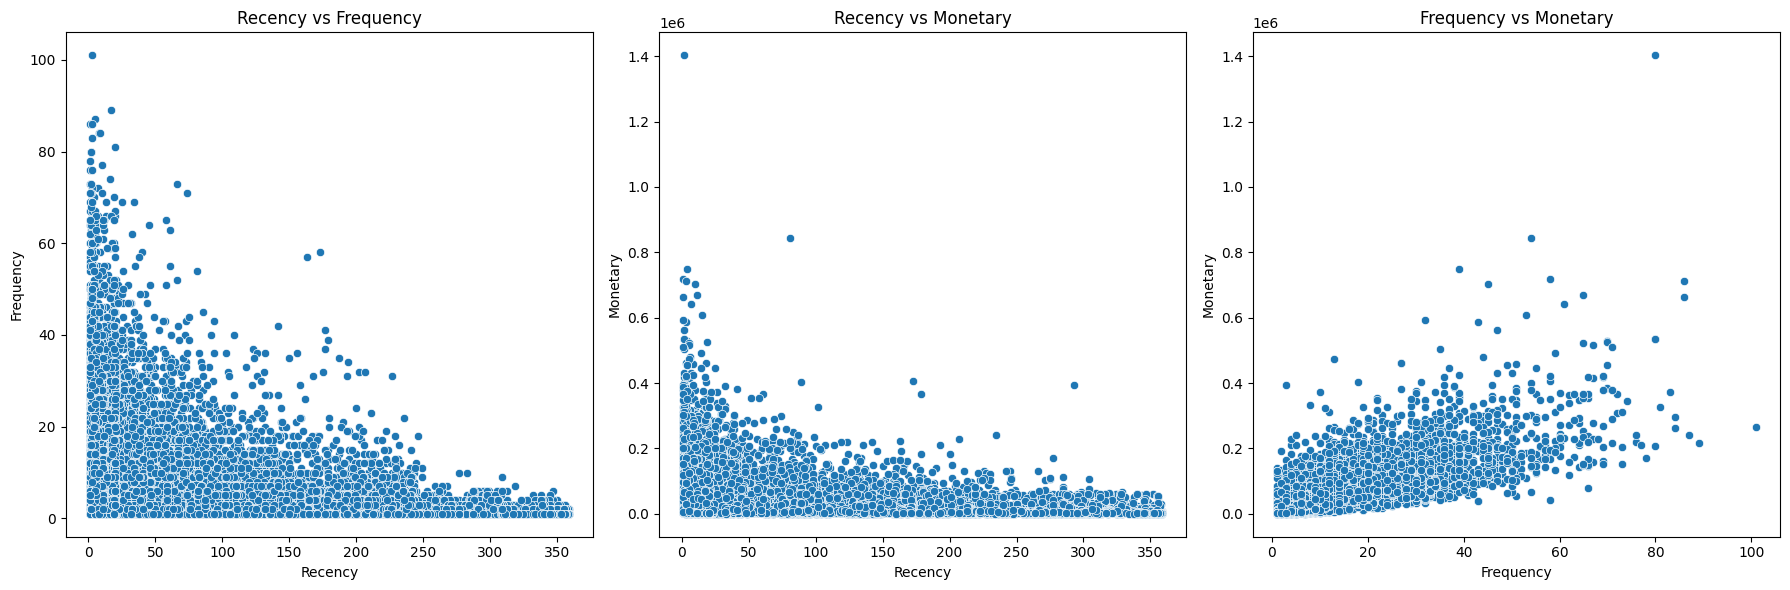

In [32]:
# 건수 많을 때는 전체 데이터셋으로 scatterplot 그리는 것 지양

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

## RFM 분석결과

### Recency
* 0\~25일: 대다수의 고객 집중
* 25\~100일: 완만한 감소
* 100일\~: 거의 변화없음

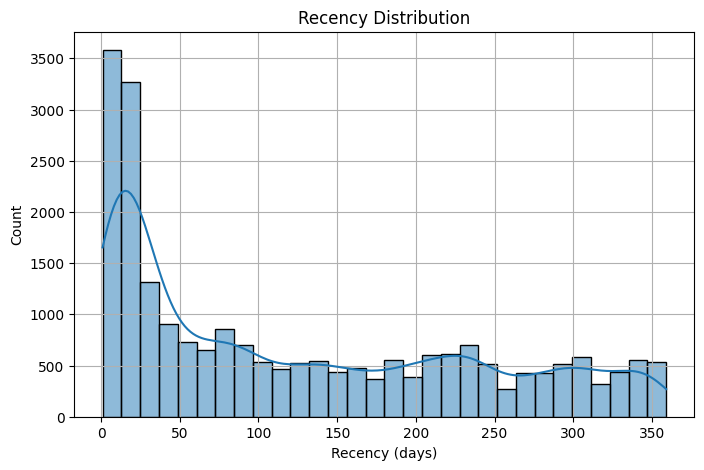

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Recency', bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Log-scaled Recency Distribution')

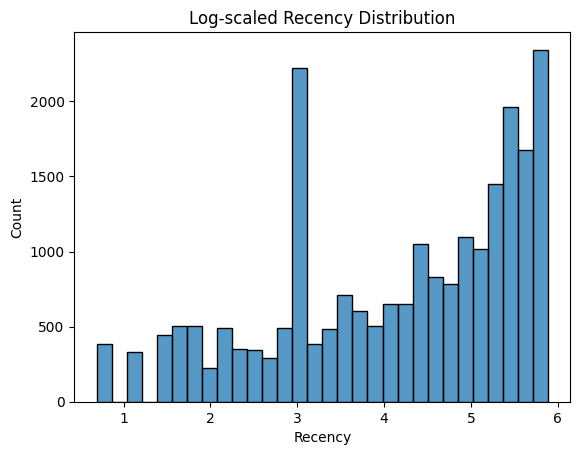

In [34]:
sns.histplot(np.log1p(rfm_df['Recency']), bins=30)
plt.title("Log-scaled Recency Distribution")

### Frequency
* 0\~5일: 대다수의 고객 집중
* 5\~40일: 완만한 감소
* 40일\~: 거의 변화없음

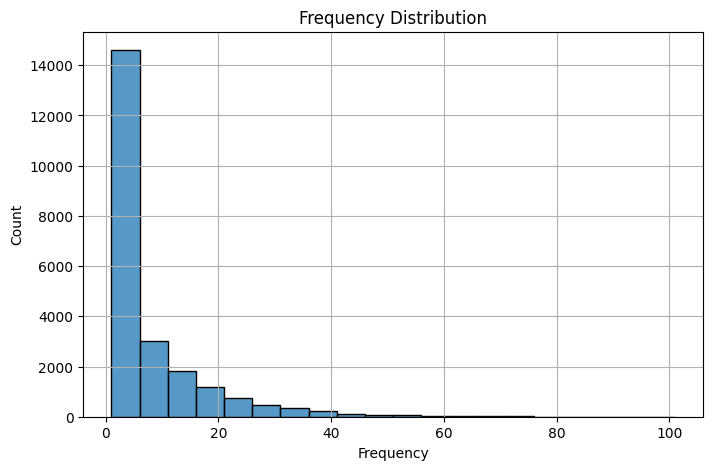

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Frequency', bins=20, kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

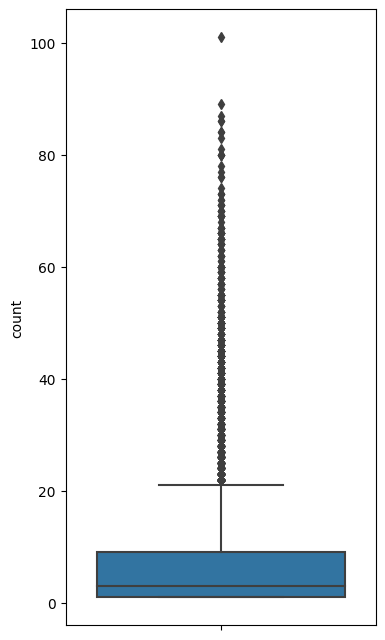

In [36]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

### Monetary
* 0\~0.7 (0\~70,000): 대다수의 고객 집중
* 0.7\~3.3 (70,000\~330,000): 완만한 감소
* 3.3\~ (330,000\~): 거의 변화없음

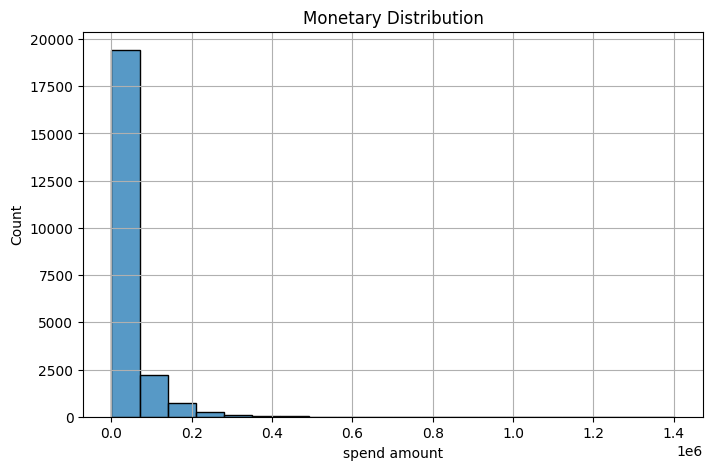

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Monetary', bins=20, kde=False)
plt.title('Monetary Distribution')
plt.xlabel('spend amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

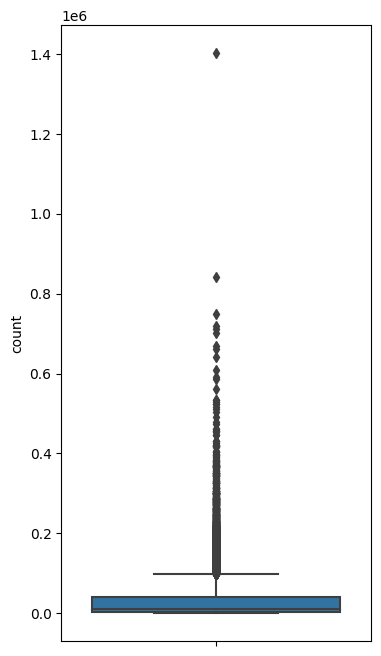

In [38]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Monetary')
plt.ylabel('count')
plt.show()

## RFM 점수계산

### recency grading

In [39]:
'''
def assign_R(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 90:
        return 3
    elif recency <= 180:
        return 2
    elif recency <= 365:
        return 1
    else:
        return 0
'''
# 일반적인 비즈니스 분할방식 30,60,90,180,365

'\ndef assign_R(recency):\n    if recency <= 30:\n        return 5\n    elif recency <= 60:\n        return 4\n    elif recency <= 90:\n        return 3\n    elif recency <= 180:\n        return 2\n    elif recency <= 365:\n        return 1\n    else:\n        return 0\n'

In [40]:
def assign_R(recency):
    if recency <= 25:
        return 3
    elif recency <= 100:
        return 2
    else:
        return 1

# rfm_df['R'] = assign_R(rfm['Recency'])는 틀림. 함수에 Recency값 전체를 넣기 때문
rfm_df['R'] = rfm_df['Recency'].apply(assign_R)

In [41]:
rfm_df.head()

,Recency,Frequency,Monetary,R
USER_ID_hash,,,,
0000b53e182165208887ba65c079fc21,275,1,4920,1
00035b86e6884589ec8d28fbf2fe7757,87,1,1620,2
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660,1
000cc06982785a19e2a2fdb40b1c9d59,31,21,54606,2
0013518e41c416cd6a181d277dd8ca0b,59,4,33095,2


In [42]:
rfm_df.groupby('R').count()

,Recency,Frequency,Monetary
R,,,
1,10580,10580,10580
2,5235,5235,5235
3,6967,6967,6967


In [43]:
rfm_df.groupby('R').mean()

,Recency,Frequency,Monetary
R,,,
1,229.049811,2.774764,11739.587335
2,59.060936,8.042025,37190.413181
3,11.977752,14.000144,62250.820726


### frequency grading

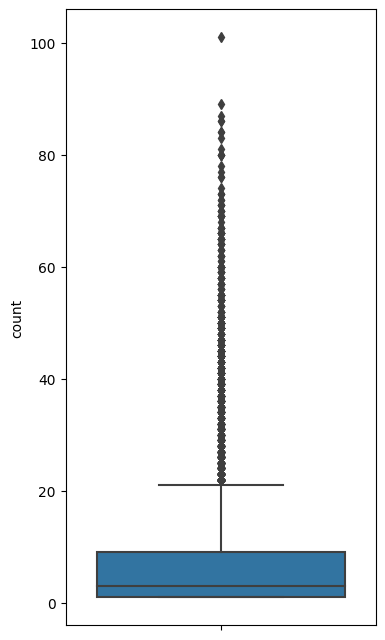

In [44]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

In [45]:
rfm_df[rfm_df['Frequency'] >= 20].shape

(2322, 4)

In [46]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean().round(2), rfm_df['Frequency'].median()

(1, 101, 7.42, 3.0)

In [47]:
rfm_df['Frequency_adj'] = rfm_df['Frequency'].apply(lambda x: 21 if x>=21 else x)

In [48]:
# quantile binning(값이 비슷하게)
q_binned = pd.qcut(rfm_df['Frequency_adj'], q=3)
q_binned.value_counts().sort_index()

Frequency_adj
(0.999, 2.0]    9677
(2.0, 6.0]      5706
(6.0, 21.0]     7399
Name: count, dtype: int64

In [49]:
# quantile binning(값이 비슷하게)
u_binned = pd.cut(rfm_df['Frequency_adj'], bins=20)
u_binned.value_counts().sort_index()

Frequency_adj
(0.98, 2.0]     9677
(2.0, 3.0]      2257
(3.0, 4.0]      1576
(4.0, 5.0]      1092
(5.0, 6.0]       781
(6.0, 7.0]       703
(7.0, 8.0]       542
(8.0, 9.0]       543
(9.0, 10.0]      443
(10.0, 11.0]     412
(11.0, 12.0]     390
(12.0, 13.0]     353
(13.0, 14.0]     342
(14.0, 15.0]     339
(15.0, 16.0]     265
(16.0, 17.0]     293
(17.0, 18.0]     226
(18.0, 19.0]     226
(19.0, 20.0]     186
(20.0, 21.0]    2136
Name: count, dtype: int64

In [50]:
# rfm_df['F'] = pd.cut(rfm_df['Frequency_adj'], bins=5, labels=[1,2,3,4,5])

In [51]:
def assign_F(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 40:
        return 2
    else:
        return 3

rfm_df['F'] = rfm_df['Frequency'].apply(assign_F)

In [52]:
rfm_df['F'].value_counts()

F
1    14602
2     7802
3      378
Name: count, dtype: int64

### Monetary grading

In [53]:
def assign_M(Monetary):
    if Monetary <= 70000:
        return 1
    elif Monetary <= 330000:
        return 2
    else:
        return 3

rfm_df['M'] = rfm_df['Monetary'].apply(assign_M)

In [54]:
rfm_df['M'].value_counts()

M
1    19410
2     3274
3       98
Name: count, dtype: int64

### RFM score 생성

In [55]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

rfm_df.sample(5)

,Recency,Frequency,Monetary,R,Frequency_adj,F,M,RFM_Score
USER_ID_hash,,,,,,,,
74d1a92810bc6f72a9b4f6bc03df0422,347,1,500,1,1,1,1,3
83903b05fb4f360d827538fdae04c4b1,207,3,3023,1,3,1,1,3
0bced41c20bd7965821c8a729d341607,59,3,18750,2,3,1,1,4
f84521404999cccab01ad3ff826b798d,226,6,6700,1,6,2,1,4
dbfc6783ff2550e601b8ab4fab1eec0a,297,1,2315,1,1,1,1,3


In [56]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,237.126802,1.881043,7230.668787
4,89.196957,4.030155,16000.410486
5,37.875975,6.777534,25252.610136
6,21.636228,14.184117,57400.210291
7,10.875743,23.108050,128740.473798
8,8.156463,49.700680,216824.010204
9,6.086207,60.896552,462755.879310


In [57]:
rfm_df['RFM_Score'].value_counts().sort_index()


RFM_Score
3    9432
4    3681
5    4104
6    3362
7    1851
8     294
9      58
Name: count, dtype: int64

## RFM 기반 고객 분류
* 3\~4: 이탈고객
* 5\~7: 잠재활성가능고객
* 8\~9: 충성고객
---
다만 중간층고객을 R/F/M 각각의 세부수치로 할지 그냥 RFM score로 할지는 고민중  
RFM score로만 하기에는 score:5인 집단이 조금 애매함  
그렇다고 세부수치로 하기에는 정확한 근거가 없음. RFM score별 집단 평균으로 해봤는데 평균이라 그런지 분류가 제대로 안 됨

In [ ]:
# 예시코드
'''
def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값
'''
# rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

In [59]:
def classify_customer(df):
    score = df['RFM_Score']
    r, f, m = df['Recency'], df['Frequency'], df['Monetary']
    
     # VIP
    if score >= 8:
        return '충성고객'
    # elif r<=38 and f>=14 and m>=57400:
    #     return '중간고객'
    elif score >= 5:
        return '일반고객'
    else :
        return '저활성고객'

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

In [60]:
rfm_df.head()

,Recency,Frequency,Monetary,R,Frequency_adj,F,M,RFM_Score,고객등급
USER_ID_hash,,,,,,,,,
0000b53e182165208887ba65c079fc21,275,1,4920,1,1,1,1,3,저활성고객
00035b86e6884589ec8d28fbf2fe7757,87,1,1620,2,1,1,1,4,저활성고객
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660,1,2,1,1,3,저활성고객
000cc06982785a19e2a2fdb40b1c9d59,31,21,54606,2,21,2,1,5,일반고객
0013518e41c416cd6a181d277dd8ca0b,59,4,33095,2,4,1,1,4,저활성고객


In [61]:
rfm_df.groupby(['고객등급'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
고객등급,,,
일반고객,26.651819,12.694537,57412.776216
저활성고객,195.600854,2.484329,9692.456265
충성고객,7.815341,51.545455,257346.875000


In [62]:
rfm_df['고객등급'].value_counts()

고객등급
저활성고객    13113
일반고객      9317
충성고객       352
Name: count, dtype: int64

## VIP 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [63]:
# VIP 먼저 특징분석
vip_df = rfm_df[rfm_df['고객등급']=='충성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [64]:
vip_df.sample()

,Recency,Frequency,Monetary,고객등급
USER_ID_hash,,,,
6bc4a74db37ad11847e2e927ce61663c,16,8,332470,충성고객


In [65]:
vip_df['고객등급'].unique()

array(['충성고객'], dtype=object)

In [66]:
# USER_ID_hash가 index이므로 column으로 잠시 변환
vip_df = vip_df.reset_index()

In [67]:
vip_df.sample()

,USER_ID_hash,Recency,Frequency,Monetary,고객등급
181,8325483e9ddff8b2e537ff4fc5c3cbaf,2,36,419131,충성고객


### Merging(df_detail, df_list): 구매기록

In [68]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [69]:
vip_purchase = vip_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [70]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [71]:
vip_purchase = vip_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [72]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [73]:
vip_purchase.sample(3).T

,17587,5337,3712
USER_ID_hash,fa7db113580332a503dedb38fd54134f,505f6ccbc52335a193b41b8110d2c557,3968e380f590562af30a5045dfada58f
Recency,1,23,5
Frequency,71,41,64
Monetary,511153,204003,217383
고객등급,충성고객,충성고객,충성고객
ITEM_COUNT,2,1,1
I_DATE,2012-03-13,2011-08-25,2011-10-27
COUPON_ID_hash,42516563f617266a550bebee08760c2e,05b6007da0e90094462756b36b1930cd,4a107670427c3daad22de6ae83517a47
PURCHASEID_hash,44ad2258fb9008c7c7d944167d2105e6,3d4eb19f6505c05e107919ed70b63bdf,f46340e3a3395eab471889e50e6aaf4d
GENRE_NAME,グルメ,グルメ,宅配


In [74]:
vip_purchase['GENRE_NAME'].unique()

array(['宅配', 'グルメ', 'ギフトカード', 'その他のクーポン', 'レジャー', 'ホテル・旅館', 'エステ', 'レッスン',
       'ヘアサロン', 'ネイル・アイ', 'リラクゼーション', 'ビューティー', '健康・医療'], dtype=object)

In [75]:
genre_en = {
    '宅配': 'Delivery service',
    'グルメ': 'Food',
    'ギフトカード': 'Gift card',
    'その他のクーポン': 'Other coupon',
    'レッスン': 'Lesson',
    'ホテル・旅館': 'Hotel and Japanese hotel',
    'エステ': 'Spa',
    'レジャー': 'Leisure',
    'ヘアサロン': 'Hair salon',
    'ネイル・アイ': 'Nail and eye salon',
    'リラクゼーション': 'Relaxation',
    'ビューティー': 'Beauty',
    '健康・医療': 'Health and medical'
}

vip_purchase['GENRE_NAME'] = vip_purchase['GENRE_NAME'].map(genre_en)

In [76]:
vip_purchase['GENRE_NAME'].unique()

array(['Delivery service', 'Food', 'Gift card', 'Other coupon', 'Leisure',
       'Hotel and Japanese hotel', 'Spa', 'Lesson', 'Hair salon',
       'Nail and eye salon', 'Relaxation', 'Beauty', 'Health and medical'],
      dtype=object)

In [77]:
vip_purchase['small_area_name'].unique()

array(['銀座・新橋・東京・上野', '滋賀', '兵庫', '静岡', '沖縄', '千葉', '新宿・高田馬場・中野・吉祥寺',
       '恵比寿・目黒・品川', '渋谷・青山・自由が丘', '横浜', '北海道', '池袋・神楽坂・赤羽', '埼玉', '愛媛',
       'キタ', '京都', '岡山', '愛知', '和歌山', 'ミナミ他', '福岡', '香川', '川崎・湘南・箱根他',
       '赤坂・六本木・麻布', '奈良', '岐阜', '宮城', '新潟', '三重', '群馬', '茨城', '広島', '佐賀',
       '立川・町田・八王子他', '長野', '石川', '長崎', '福井', '山口', '秋田', '宮崎', '栃木', '富山',
       '徳島', '鳥取', '青森', '鹿児島', '福島', '大分', '高知', '島根', '山形', '山梨', '岩手',
       '熊本'], dtype=object)

In [78]:
df_list['large_area_name'].unique()

array(['関東', '関西', '東海', '北海道', '九州・沖縄', '東北', '四国', '中国', '北信越'],
      dtype=object)

In [79]:
df_list['ken_name'].unique()

array(['埼玉県', '千葉県', '東京都', '京都府', '愛知県', '神奈川県', '北海道', '福岡県', '栃木県',
       '大阪府', '宮城県', '福島県', '大分県', '高知県', '広島県', '新潟県', '岡山県', '愛媛県',
       '香川県', '徳島県', '兵庫県', '岐阜県', '宮崎県', '長崎県', '石川県', '山形県', '静岡県',
       '青森県', '沖縄県', '秋田県', '長野県', '岩手県', '熊本県', '山口県', '佐賀県', '奈良県',
       '三重県', '群馬県', '和歌山県', '山梨県', '鳥取県', '鹿児島県', '福井県', '滋賀県', '富山県',
       '島根県', '茨城県'], dtype=object)

In [80]:
small_area_en = {
    '銀座・新橋・東京・上野': 'Ginza / Shimbashi / Tokyo / Ueno',
    '滋賀': 'Shiga',
    '兵庫': 'Hyogo',
    '静岡': 'Shizuoka',
    '沖縄': 'Okinawa',
    '千葉': 'Chiba',
    '新宿・高田馬場・中野・吉祥寺': 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
    '恵比寿・目黒・品川': 'Ebisu / Meguro / Shinagawa',
    '渋谷・青山・自由が丘': 'Shibuya / Aoyama / Jiyugaoka',
    '横浜': 'Yokohama',
    '北海道': 'Hokkaido',
    '池袋・神楽坂・赤羽': 'Ikebukuro / Kagurazaka / Akabane',
    '埼玉': 'Saitama',
    '愛媛': 'Ehime',
    'キタ': 'Kita',
    '京都': 'Kyoto',
    '岡山': 'Okayama',
    '愛知': 'Aichi',
    '和歌山': 'Wakayama',
    'ミナミ他': 'Minami area',
    '福岡': 'Fukuoka',
    '香川': 'Kagawa',
    '川崎・湘南・箱根他': 'Kawasaki / Shonan / Hakone',
    '赤坂・六本木・麻布': 'Akasaka / Roppongi / Azabu',
    '奈良': 'Nara',
    '岐阜': 'Gifu',
    '宮城': 'Miyagi',
    '新潟': 'Niigata',
    '三重': 'Mie',
    '群馬': 'Gunma',
    '茨城': 'Ibaraki',
    '広島': 'Hiroshima',
    '佐賀': 'Saga',
    '立川・町田・八王子他': 'Tachikawa / Machida / Hachioji',
    '長野': 'Nagano',
    '石川': 'Ishikawa',
    '長崎': 'Nagasaki',
    '福井': 'Fukui',
    '山口': 'Yamaguchi',
    '秋田': 'Akita',
    '宮崎': 'Miyazaki',
    '栃木': 'Tochigi',
    '富山': 'Toyama',
    '徳島': 'Tokushima',
    '鳥取': 'Tottori',
    '青森': 'Aomori',
    '鹿児島': 'Kagoshima',
    '福島': 'Fukushima',
    '大分': 'Oita',
    '高知': 'Kochi',
    '島根': 'Shimane',
    '山形': 'Yamagata',
    '山梨': 'Yamanashi',
    '岩手': 'Iwate',
    '熊本': 'Kumamoto'
}
vip_purchase['small_area_name'] = vip_purchase['small_area_name'].map(small_area_en)

In [81]:
vip_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Shiga', 'Hyogo', 'Shizuoka',
       'Okinawa', 'Chiba', 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Shibuya / Aoyama / Jiyugaoka',
       'Yokohama', 'Hokkaido', 'Ikebukuro / Kagurazaka / Akabane',
       'Saitama', 'Ehime', 'Kita', 'Kyoto', 'Okayama', 'Aichi',
       'Wakayama', 'Minami area', 'Fukuoka', 'Kagawa',
       'Kawasaki / Shonan / Hakone', 'Akasaka / Roppongi / Azabu', 'Nara',
       'Gifu', 'Miyagi', 'Niigata', 'Mie', 'Gunma', 'Ibaraki',
       'Hiroshima', 'Saga', 'Tachikawa / Machida / Hachioji', 'Nagano',
       'Ishikawa', 'Nagasaki', 'Fukui', 'Yamaguchi', 'Akita', 'Miyazaki',
       'Tochigi', 'Toyama', 'Tokushima', 'Tottori', 'Aomori', 'Kagoshima',
       'Fukushima', 'Oita', 'Kochi', 'Shimane', 'Yamagata', 'Yamanashi',
       'Iwate', 'Kumamoto'], dtype=object)

In [82]:
vip_purchase.sample(3).T

,890,5724,14585
USER_ID_hash,088500887e2a802fe1bfc04a82406c9d,5485f7e1ba72fca45f7cf95a6c0b336f,ceea36cea1b5efd954771ded986f17dd
Recency,17,1,25
Frequency,43,55,41
Monetary,219294,290101,180778
고객등급,충성고객,충성고객,충성고객
ITEM_COUNT,1,1,1
I_DATE,2012-02-13,2012-03-06,2011-12-14
COUPON_ID_hash,2395344937edee8a4b9c9fbca90c93e4,1c69967f4779420d5be4e4e5122ba237,88f5104242ac694d6aa9b89e43081ebf
PURCHASEID_hash,2235ce990bdeb5feeaa71817ee397ffe,3a78ed6498e50d24c57739fbb28b09da,d0f5add95b2b155c0d95d80d28733c2f
GENRE_NAME,Delivery service,Relaxation,Delivery service


In [83]:
vip_purchase['I_DATE'].dtype

dtype('O')

In [84]:
vip_purchase['I_DATE'] = pd.to_datetime(vip_purchase['I_DATE'])

In [85]:
vip_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### VIP 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [86]:
vip_total_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
vip_avg_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
vip_avg_discount = vip_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
vip_order_count = vip_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
vip_item_count = vip_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
vip_category_unique = vip_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
vip_area_unique = vip_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
def avg_repurchase_cycle(date):
    date = date.sort_values() # 날짜 정렬
    '''
    date.diff() # 인접 날짜끼리 차이 계산..! 이런 간단한 함수가 있었다니
    dropna() # 근데 처음과 끝은 인접날짜가 없으므로 NaT 널값이 나옴. 그거 제거
    dt.days() # 계산한 날짜차이를 days로 변환
    '''
    if len(date) <= 1: # 구매 횟수 1회인 경우는 계산불가
        return None
    return (date.diff().dropna().dt.days.mean())

vip_purchase_cycle = vip_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

In [87]:
vip_metrics = pd.DataFrame({
    'USER_ID_hash': vip_total_amount.index,
    '구매횟수': vip_order_count.values,
    '구매쿠폰개수': vip_item_count.values,
    '총구매금액': vip_total_amount.values,
    '평균구매금액': vip_avg_amount.values,
    '평균할인율': vip_avg_discount.values,
    '카테고리다양도': vip_category_unique.values,
    '지역다양도': vip_area_unique.values,
    '재구매주기': vip_purchase_cycle.values,
    # '평균사용기간': g_valid_period.values
})

In [88]:
vip_metrics.sample(2).T

,104,6
USER_ID_hash,52c251f6929d8a2642aec114baf7c611,047224607893fa70c5ed9c9187b721e1
구매횟수,50,57
구매쿠폰개수,50,92
총구매금액,206992,142255
평균구매금액,4139.84,2495.701754
평균할인율,60.52,56.298246
카테고리다양도,4,8
지역다양도,19,11
재구매주기,6.857143,4.160714


In [89]:
vip_metrics[vip_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(vip_metrics)

In [90]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [91]:
vip_df = vip_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [92]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [93]:
vip_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
140,6a9c68dc0b5a3735ee87c6c05eb550fc,8,52,176062,충성고객,f,63
80,4179178bda12f0172d76d524adfbb003,2,63,228206,충성고객,f,62
307,e322bd0668bafc7a2f5ee07b0e511f7d,3,55,146721,충성고객,f,50


In [94]:
vip_df = vip_df.merge(vip_metrics, on='USER_ID_hash', how='left')

In [95]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [96]:
vip_df.sample(3).T

,190,249,93
USER_ID_hash,88e021324d6663188c39f4062e92d84d,b45f2c98a7ce4e64d6bbdec8eb72e792,4c20177df5716ba57105ba5d9ed3c460
Recency,1,17,8
Frequency,43,66,84
Monetary,303410,419950,261872
고객등급,충성고객,충성고객,충성고객
SEX_ID,f,f,m
AGE,38,51,61
구매횟수,43,66,84
구매쿠폰개수,57,111,118
총구매금액,303410,419950,261872


In [97]:
vip_df['AGE_GROUP'] = (vip_df['AGE']//10)*10

In [98]:
vip_df.sample(3).T

,67,7,135
USER_ID_hash,35f3eccaa934caed4238123b1fe407ff,0514350316edb1f94ddd2a734a97649f,6840d58c305e688073a8eba7d1c28892
Recency,9,3,19
Frequency,45,66,48
Monetary,224150,353677,139195
고객등급,충성고객,충성고객,충성고객
SEX_ID,f,f,f
AGE,53,45,68
구매횟수,45,66,48
구매쿠폰개수,74,84,71
총구매금액,224150,353677,139195


In [99]:
vip_df["AGE_GROUP"].value_counts()

AGE_GROUP
50    122
40     99
30     62
60     43
20     19
70      7
Name: count, dtype: int64

In [100]:
vip_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
20,51.26,68.63,249911.26,4967.93,61.32,7.16,5.95
30,52.95,71.89,264616.53,5673.99,62.07,6.45,5.93
40,51.81,76.05,247896.73,5289.53,60.82,5.92,6.49
50,52.25,82.88,255042.19,5075.33,59.96,5.63,6.24
60,48.02,73.65,279459.44,6246.60,60.54,4.72,6.43
70,45.43,76.14,251126.00,6192.08,60.27,4.71,7.48


### VIP 분석 시각화
1. Rader Chart: minmax, standard 적용
2. Heat Map: 각 지표는 서로 다른 단위라 지표간 비교는 불가  
   “구매금액_log = 0.35 → 전체 VIP 중 하위 35% 수준” (O)  
   “구매쿠폰개수 = 0.56 → 전체 VIP 중 상위 56% 수준” (O)  
   "구매금액_log = 0.35, 구매쿠폰개수 = 0.56 → 구매금액이 적고 쿠폰을 많이 샀다” (X)  
3. Parallel Coordinates

In [101]:
import matplotlib.font_manager as fm

font_path = '/kaggle/input/font-kr/MALGUN.TTF'
fm.fontManager.addfont(font_path)
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [102]:
print(fontprop.get_name())

Malgun Gothic


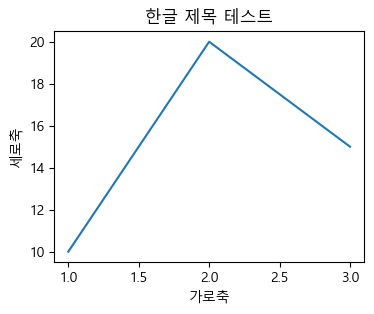

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3], [10, 20, 15])
plt.title('한글 제목 테스트')
plt.xlabel('가로축')
plt.ylabel('세로축')
plt.show()

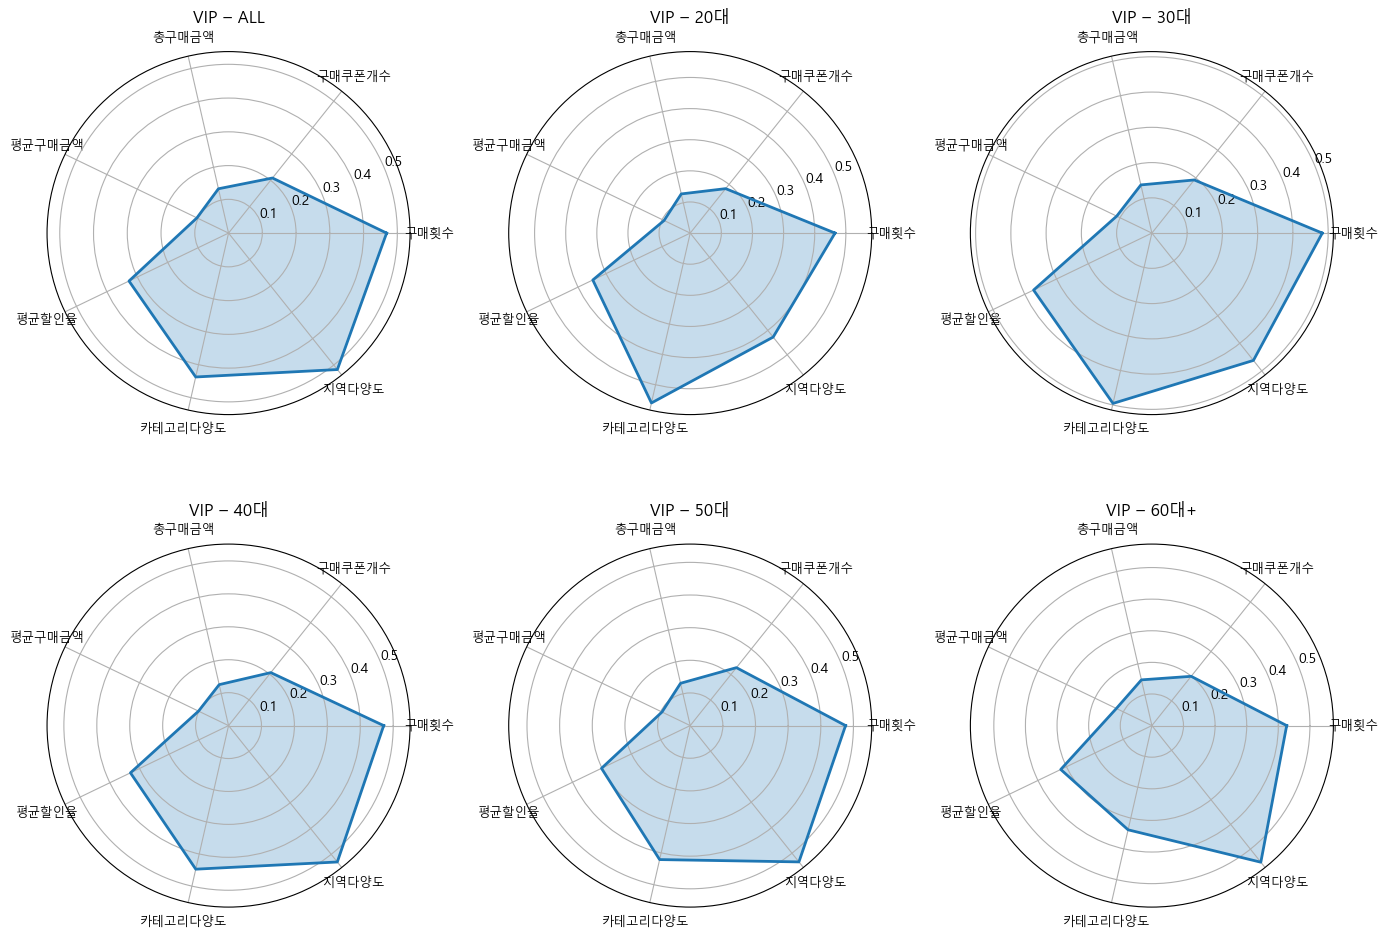

In [104]:
cols_vip = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# Rader Chart
def plot_radar(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

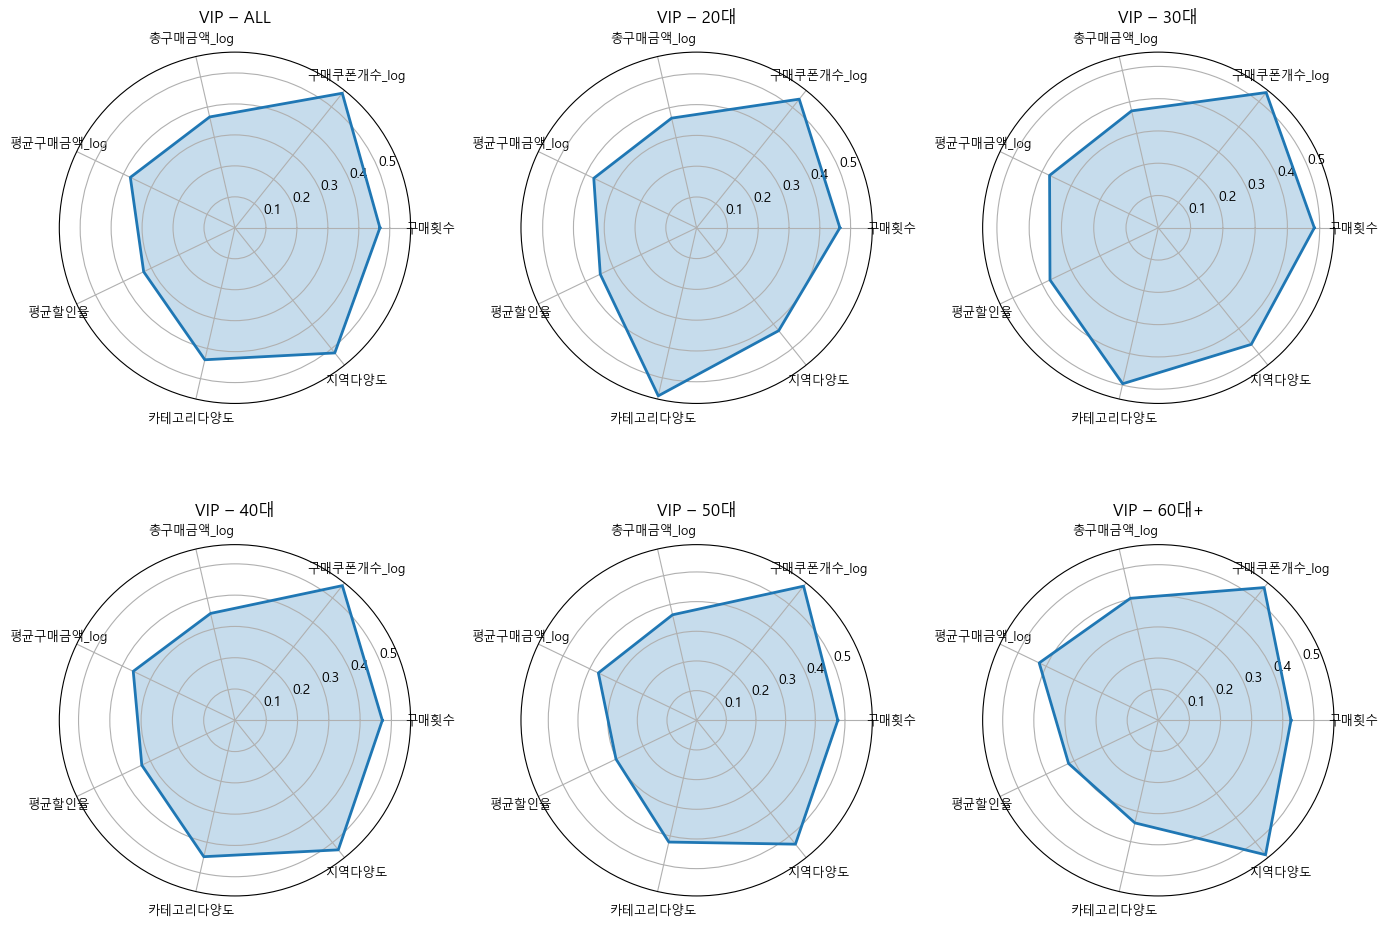

In [105]:
cols_vip_mod = [
    "구매횟수",
    "구매쿠폰개수_log",
    "총구매금액_log",
    "평균구매금액_log",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
vip_rader["총구매금액_log"] = np.log1p(vip_rader["총구매금액"])
vip_rader["평균구매금액_log"] = np.log1p(vip_rader["평균구매금액"])
vip_rader["구매쿠폰개수_log"] = np.log1p(vip_rader["구매쿠폰개수"])

minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip_mod])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip_mod)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip_mod].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip_mod].mean().values

    plot_radar(ax, radar_values, cols_vip_mod, f"VIP – {group}")

plt.tight_layout()
plt.show()

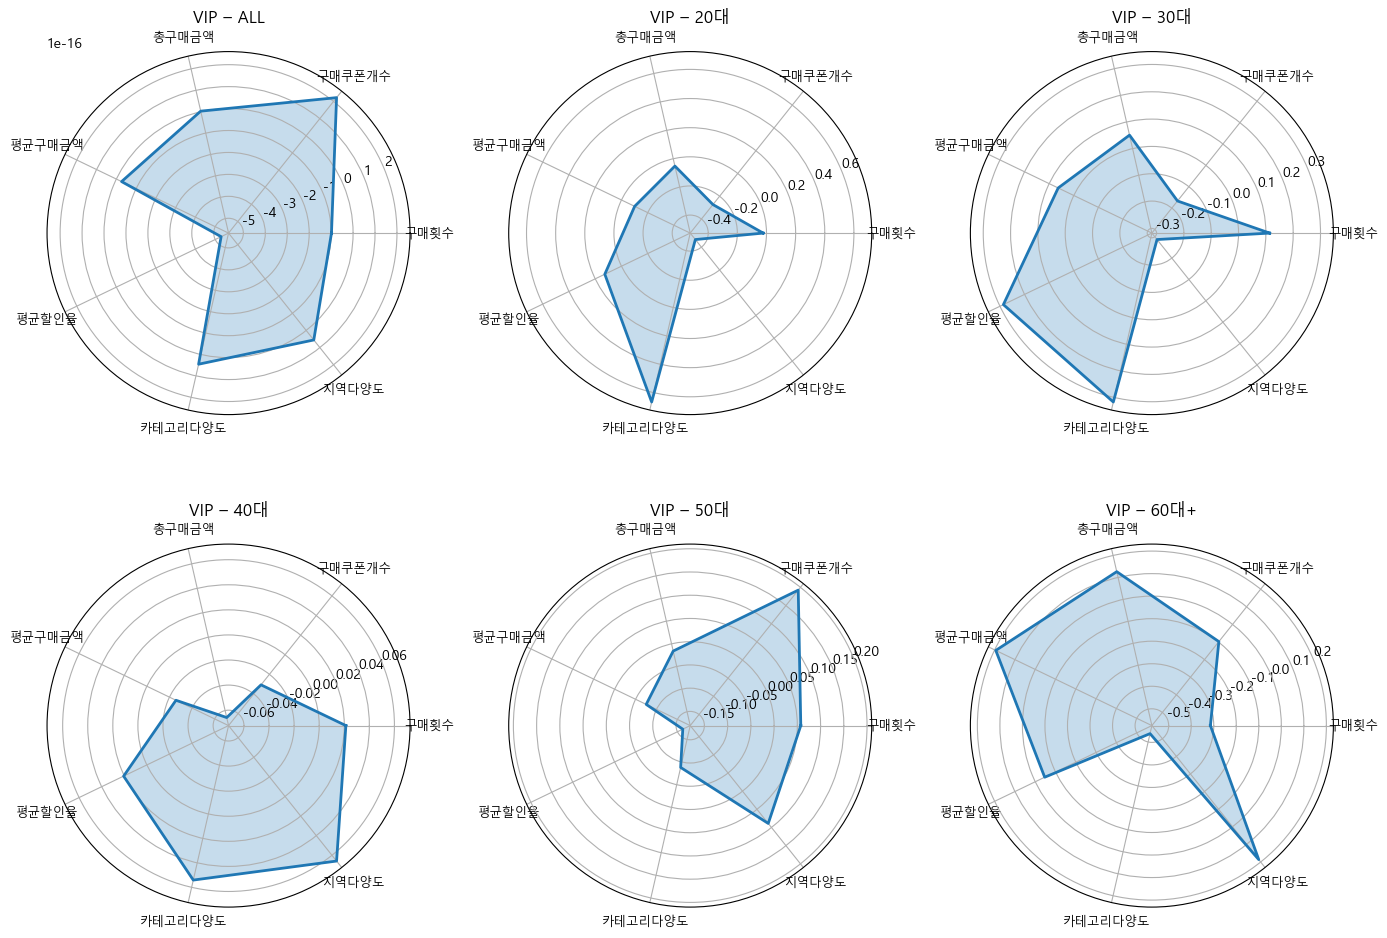

In [106]:
# Standard Scaler (연령대간 비교 불가. 각 연령대 내에서 지표들이 평균대비 얼마나 크고 작은지만 가능)
scaler = StandardScaler()
standard_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
standard_scaled_df = pd.DataFrame(standard_scaled_all, columns=cols_vip)
standard_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = standard_scaled_df[cols_vip].mean().values
    else:
        radar_values = standard_scaled_df[standard_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

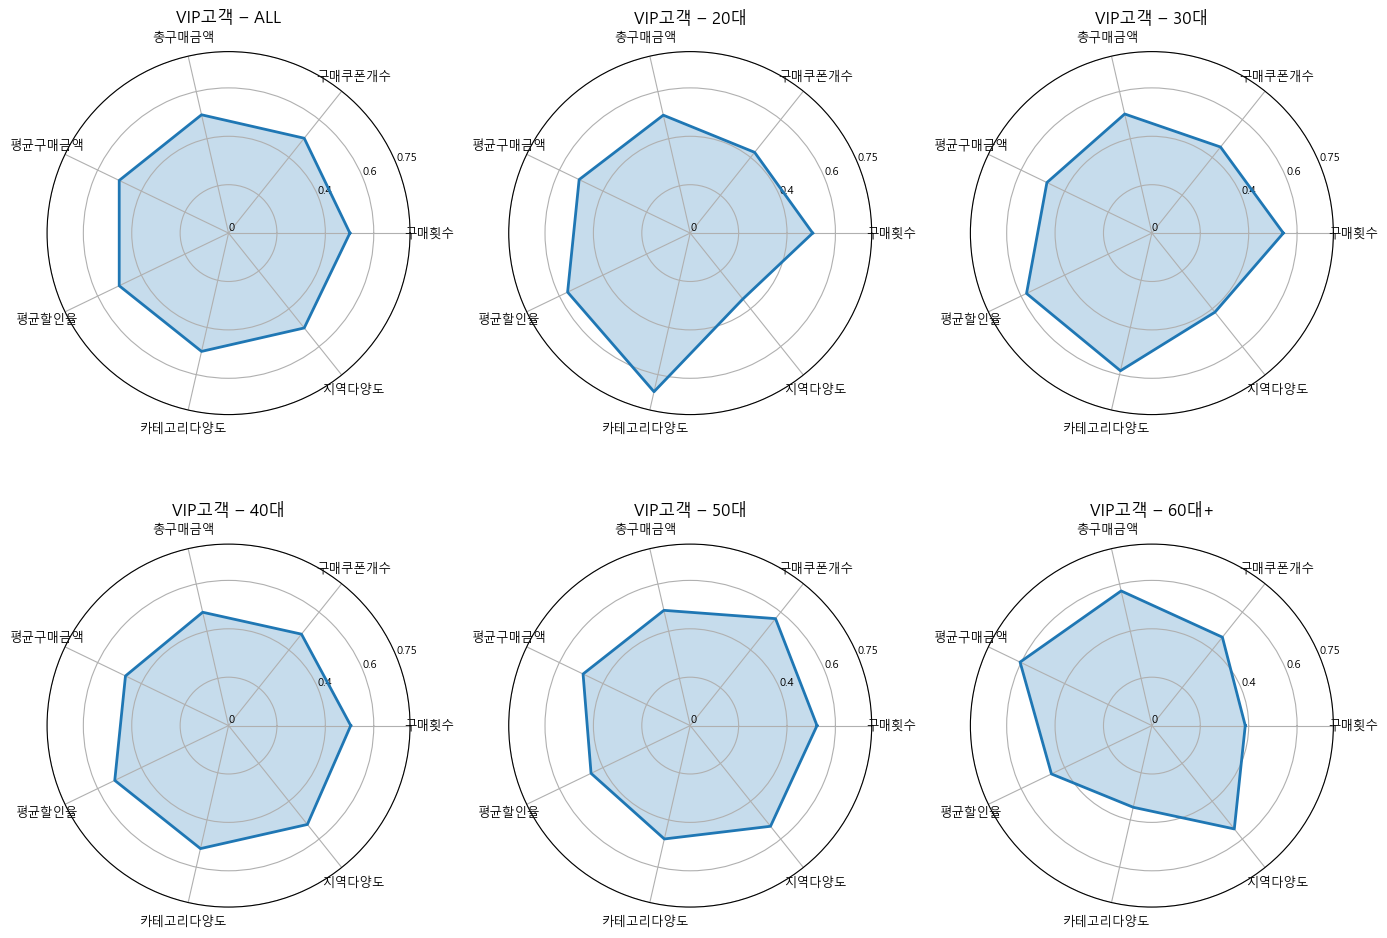

In [107]:
# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_vip:
    vip_rader[col + "_pct"] = vip_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_vip]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = vip_rader[cols_pct].mean().values
    else:
        radar_values = vip_rader[vip_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_vip, f"VIP고객 – {group}")

plt.tight_layout()
plt.show()

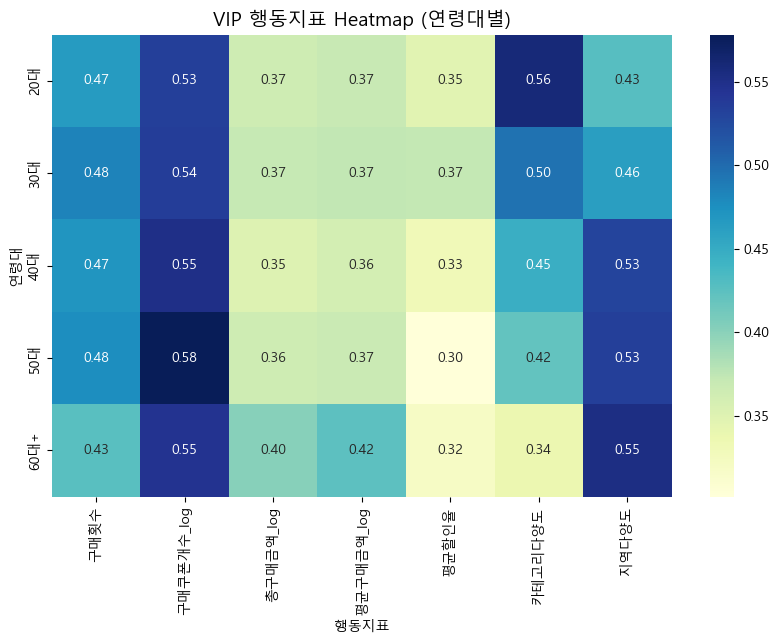

In [108]:
pivot = minmax_scaled_df.groupby("AGE_GROUP2")[cols_vip_mod].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

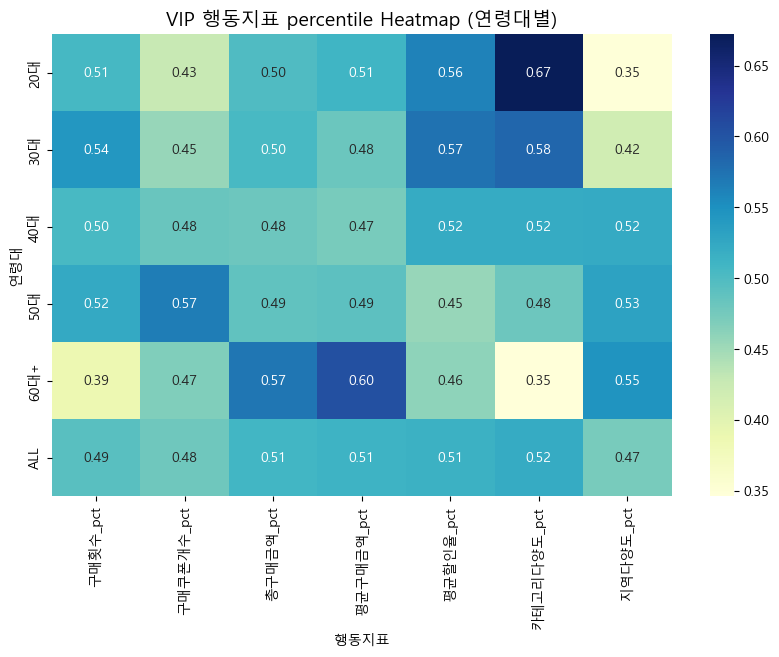

In [109]:
pivot = vip_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 percentile Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 일반고객 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [110]:
medium_df = rfm_df[rfm_df['고객등급']=='일반고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [111]:
medium_df = medium_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [112]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [113]:
medium_purchase = medium_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [114]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [115]:
medium_purchase = medium_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [116]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [117]:
medium_purchase['GENRE_NAME'] = medium_purchase['GENRE_NAME'].map(genre_en)
medium_purchase['GENRE_NAME'].unique()

array(['Gift card', 'Delivery service', 'Hair salon', 'Other coupon',
       'Food', 'Leisure', 'Relaxation', 'Hotel and Japanese hotel', 'Spa',
       'Lesson', 'Nail and eye salon', 'Health and medical', 'Beauty'],
      dtype=object)

In [118]:
medium_purchase['small_area_name'] = medium_purchase['small_area_name'].map(small_area_en)
medium_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Kita', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Minami area', 'Yokohama', 'Hyogo',
       'Ikebukuro / Kagurazaka / Akabane', 'Gifu', 'Ibaraki', 'Kagawa',
       'Saitama', 'Shibuya / Aoyama / Jiyugaoka', 'Fukuoka', 'Nagano',
       'Tottori', 'Okayama', 'Aichi', 'Tachikawa / Machida / Hachioji',
       'Tochigi', 'Yamagata', 'Tokushima', 'Saga', 'Nara', 'Chiba',
       'Akasaka / Roppongi / Azabu', 'Yamaguchi', 'Shizuoka', 'Kyoto',
       'Kawasaki / Shonan / Hakone', 'Shiga', 'Miyagi', 'Hiroshima',
       'Gunma', 'Niigata', 'Nagasaki', 'Kagoshima', 'Akita', 'Aomori',
       'Iwate', 'Oita', 'Kumamoto', 'Fukui', 'Mie', 'Kochi', 'Fukushima',
       'Okinawa', 'Yamanashi', 'Wakayama', 'Ishikawa', 'Toyama', 'Ehime',
       'Shimane', 'Miyazaki'], dtype=object)

In [119]:
medium_purchase['I_DATE'].dtype

dtype('O')

In [120]:
medium_purchase['I_DATE'] = pd.to_datetime(medium_purchase['I_DATE'])

In [121]:
medium_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 일반고객 연령별 카테고리 구성비중
* 이 세그먼트 고객 중 몇 %가 이 카테고리를 1번이라도 사용했는가?  
  -> 고객들이 어떤 카테고리에 “관심”이 있는지  
* 거래량 & 금액 기준 카테고리 사용률: 실제로 어떤 카테고리에서 돈이 나오는지

In [242]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [243]:
medium_purchase.sample(3).T

,64286,50843,21705
USER_ID_hash,8b411fcd06a90dd5dbfcab1982b3d380,70479ee8862d202936b82f61510a082d,2e8f71b07d4880a89a86e4734d6a9b43
Recency,3,4,16
Frequency,17,29,15
Monetary,72888,88506,79201
고객등급,일반고객,일반고객,일반고객
ITEM_COUNT,1,2,1
I_DATE,2012-06-21 00:00:00,2012-05-01 00:00:00,2012-03-19 00:00:00
COUPON_ID_hash,3bcc5f9e1bf023e87f6f0b729b68f4de,87482fa4730bcf6e04e816effc1227d1,1e5aebca3c1cc8e9e0e5e4f6e7d19f42
PURCHASEID_hash,c1922a5b3bea5dd3be84604c22380114,9f70891f043179f1b70e032b01ae2b50,f219af345cf0abd90f4fea7e895297c6
GENRE_NAME,Delivery service,Delivery service,Delivery service


In [244]:
# AGE_GROUP join (연령 정보 추가)
medium_purchase = medium_purchase.merge(
    df_user[['USER_ID_hash', 'AGE']],
    on='USER_ID_hash',
    how='left'
)
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [245]:
medium_purchase['AGE_GROUP'] = (medium_purchase['AGE']//10)*10
medium_purchase["AGE_GROUP"] = medium_purchase["AGE_GROUP"].apply(age_group_func)

KeyError: 'AGE'

In [246]:
medium_purchase.sample(3).T

,31296,54589,70422
USER_ID_hash,45a84af9196ae632cf3a32673c1ebdea,77b316af0bcec400c30720128754c9cb,977bbadd20cb51012441c105c3a0ced5
Recency,43,82,9
Frequency,19,8,17
Monetary,128172,15610,129667
고객등급,일반고객,일반고객,일반고객
ITEM_COUNT,1,1,1
I_DATE,2012-05-12 00:00:00,2012-01-13 00:00:00,2012-03-27 00:00:00
COUPON_ID_hash,deb63537a67b123a9344627800332a33,e123511c8e6eba2b3591bed3df126780,ecc31e2ca1d796bdbf66357318ff08d7
PURCHASEID_hash,696dc3f243e199a633c3f0640a1cee6b,bb95f250423d8f16bef1546ae93eaf0e,0f2c4a2da2f85165069b5dfae6ed7cf0
GENRE_NAME,Other coupon,Leisure,Lesson


In [247]:
# 사용자 기반(User-based) 연령대별 카테고리 관심도 (1번이상  구매)
medium_user_category = (
    medium_purchase.groupby(['AGE_GROUP', 'USER_ID_hash', 'GENRE_NAME'])['PURCHASEID_hash']
        .nunique()
        .reset_index()
)

medium_user_category['used'] = 1

# pivot → 연령대 × 카테고리 (사용자 비율)
medium_user_category_interest = (
    medium_user_category
        .pivot_table(index=['AGE_GROUP', 'USER_ID_hash'],
                     columns='GENRE_NAME',
                     values='used',
                     fill_value=0)
        .groupby(level=0)  # AGE_GROUP 단위로 묶기
        .mean()            # 사용자 평균 → 사용자 비율(User %)
        .sort_index()
)

In [248]:
print("1번이상 구매한 카테고리들")
medium_user_category_interest.loc['60대+'].sort_values(ascending=False)

1번이상 구매한 카테고리들


GENRE_NAME
Delivery service            0.822967
Other coupon                0.663158
Food                        0.628708
Hotel and Japanese hotel    0.591388
Leisure                     0.305263
Gift card                   0.280383
Relaxation                  0.065072
Hair salon                  0.053589
Spa                         0.034450
Lesson                      0.017225
Nail and eye salon          0.017225
Health and medical          0.005742
Beauty                      0.002871
Name: 60대+, dtype: float64

In [249]:
medium_user_category_volume = (
    medium_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASEID_hash']
                .nunique()   # 구매 건수 기준
                .groupby(level=0)
                .apply(lambda x: x / x.sum())   # 연령대별 정규화
)

In [250]:
print("구매량 기준 카테고리 정렬")
medium_user_category_volume.loc['60대+'].sort_values(ascending=False)

구매량 기준 카테고리 정렬


AGE_GROUP  GENRE_NAME              
60대+       Delivery service            0.378919
           Food                        0.253919
           Hotel and Japanese hotel    0.174324
           Other coupon                0.098311
           Leisure                     0.040676
           Gift card                   0.028108
           Relaxation                  0.009392
           Hair salon                  0.007838
           Spa                         0.004054
           Nail and eye salon          0.002027
           Lesson                      0.001419
           Health and medical          0.000608
           Beauty                      0.000405
Name: PURCHASEID_hash, dtype: float64

In [251]:
medium_user_category_revenue = (
    medium_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASE_PRICE']
        .sum()
        .reset_index()
)

medium_revenue_share = (
    medium_user_category_revenue
        .groupby('AGE_GROUP')
        .apply(lambda x: x.set_index('GENRE_NAME')['PURCHASE_PRICE'] /
                        x['PURCHASE_PRICE'].sum())
        .unstack(level='AGE_GROUP')
        .fillna(0)
)

In [256]:
print("사용금액 기준 카테고리 정렬")
medium_revenue_share.xs('60대+', level='AGE_GROUP').sort_values(ascending=False)

사용금액 기준 카테고리 정렬


GENRE_NAME
Hotel and Japanese hotel    0.404406
Delivery service            0.361498
Food                        0.131323
Other coupon                0.026655
Hair salon                  0.014753
Leisure                     0.013951
Spa                         0.013893
Relaxation                  0.010477
Gift card                   0.008559
Lesson                      0.007725
Health and medical          0.003926
Nail and eye salon          0.002445
Beauty                      0.000387
dtype: float64

### 일반고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [122]:
def get_purchase_metrics(df_purchase):
    df_total_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
    df_avg_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
    df_avg_discount = df_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
    df_order_count = df_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
    df_item_count = df_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
    df_category_unique = df_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
    df_area_unique = df_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
    df_purchase_cycle = df_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

    df_metrics = pd.DataFrame({
        'USER_ID_hash': df_total_amount.index,
        '구매횟수': df_order_count.values,
        '구매쿠폰개수': df_item_count.values,
        '총구매금액': df_total_amount.values,
        '평균구매금액': df_avg_amount.values,
        '평균할인율': df_avg_discount.values,
        '카테고리다양도': df_category_unique.values,
        '지역다양도': df_area_unique.values,
        '재구매주기': df_purchase_cycle.values,
        # '평균사용기간': g_valid_period.values
    })

    return df_metrics

In [123]:
medium_metrics = get_purchase_metrics(medium_purchase)
medium_metrics.sample(3).T

,1163,8186,4429
USER_ID_hash,202e62fffd5f00eda862f5fb6d8eb87c,e01d4f2baa8bd7a8e41c4d92c4d3f616,7bc7f5f7a1229c119481134857e417a6
구매횟수,19,1,27
구매쿠폰개수,27,1,35
총구매금액,63213,500,121985
평균구매금액,3327.0,500.0,4517.962963
평균할인율,71.105263,50.0,51.703704
카테고리다양도,6,1,5
지역다양도,6,1,17
재구매주기,19.0,NaN,12.5


In [124]:
medium_metrics[medium_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(medium_metrics)

In [125]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [126]:
medium_df = medium_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [127]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [128]:
medium_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
473,0d14ee617b9abce18ad386752ab11d18,5,16,48760,일반고객,f,39
8442,e7348c642c76390ead1db6ae47b3e045,2,12,77340,일반고객,f,47
124,030f3f629175c9b2a9b9eee531c16db0,35,8,56115,일반고객,f,40


In [129]:
medium_df = medium_df.merge(medium_metrics, on='USER_ID_hash', how='left')
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [130]:
medium_df.sample(3).T

,2485,6326,5337
USER_ID_hash,4617edc68a33a973ad0e7775f4502793,ad2efc6486235a329920bc8cca53b2d8,930c1a0e3d6b0c6410375898f650794c
Recency,23,18,2
Frequency,16,16,12
Monetary,193441,102648,38350
고객등급,일반고객,일반고객,일반고객
SEX_ID,m,f,m
AGE,42,58,45
구매횟수,16,16,12
구매쿠폰개수,22,34,24
총구매금액,193441,102648,38350


In [131]:
medium_df['AGE_GROUP'] = (medium_df['AGE']//10)*10
medium_df.sample(3).T

,954,159,5474
USER_ID_hash,1a78d46c6e7b5a90040dd8acb30b7675,044322c4c600e909dbcc36805e319dd8,95defb40b83ea5420efac0afb13c5285
Recency,12,5,7
Frequency,16,5,28
Monetary,76998,10410,73426
고객등급,일반고객,일반고객,일반고객
SEX_ID,m,f,m
AGE,59,29,29
구매횟수,16,5,28
구매쿠폰개수,29,6,51
총구매금액,76998,10410,73426


In [132]:
medium_df["AGE_GROUP"].value_counts()

AGE_GROUP
40    2813
30    2430
50    1947
20    1059
60     891
70     152
10      23
80       2
Name: count, dtype: int64

In [133]:
medium_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
10,5.17,5.57,11084.22,3202.74,77.41,2.43,46.29
20,10.26,13.53,51322.38,4879.20,67.88,3.87,32.47
30,11.59,15.71,49767.42,4411.51,66.75,3.79,32.93
40,12.79,18.55,55236.96,4460.45,64.81,3.74,31.80
50,14.55,21.94,68223.66,4805.85,62.82,3.72,26.04
60,14.27,22.39,69027.30,4912.94,61.81,3.54,27.16
70,13.61,20.75,63186.95,4323.48,62.58,3.20,28.58
80,9.00,10.50,26949.00,5014.23,58.46,2.50,38.33


### 일반고객 분석 시각화
1. Rader Chart: percentile scaling 적용
2. Heat Map  
   같은 지표 내에서 연령대 간 상대적 위치를 비교  
   같은 연령대에서 지표 간 비교는 불가   
3. Parallel Coordinates

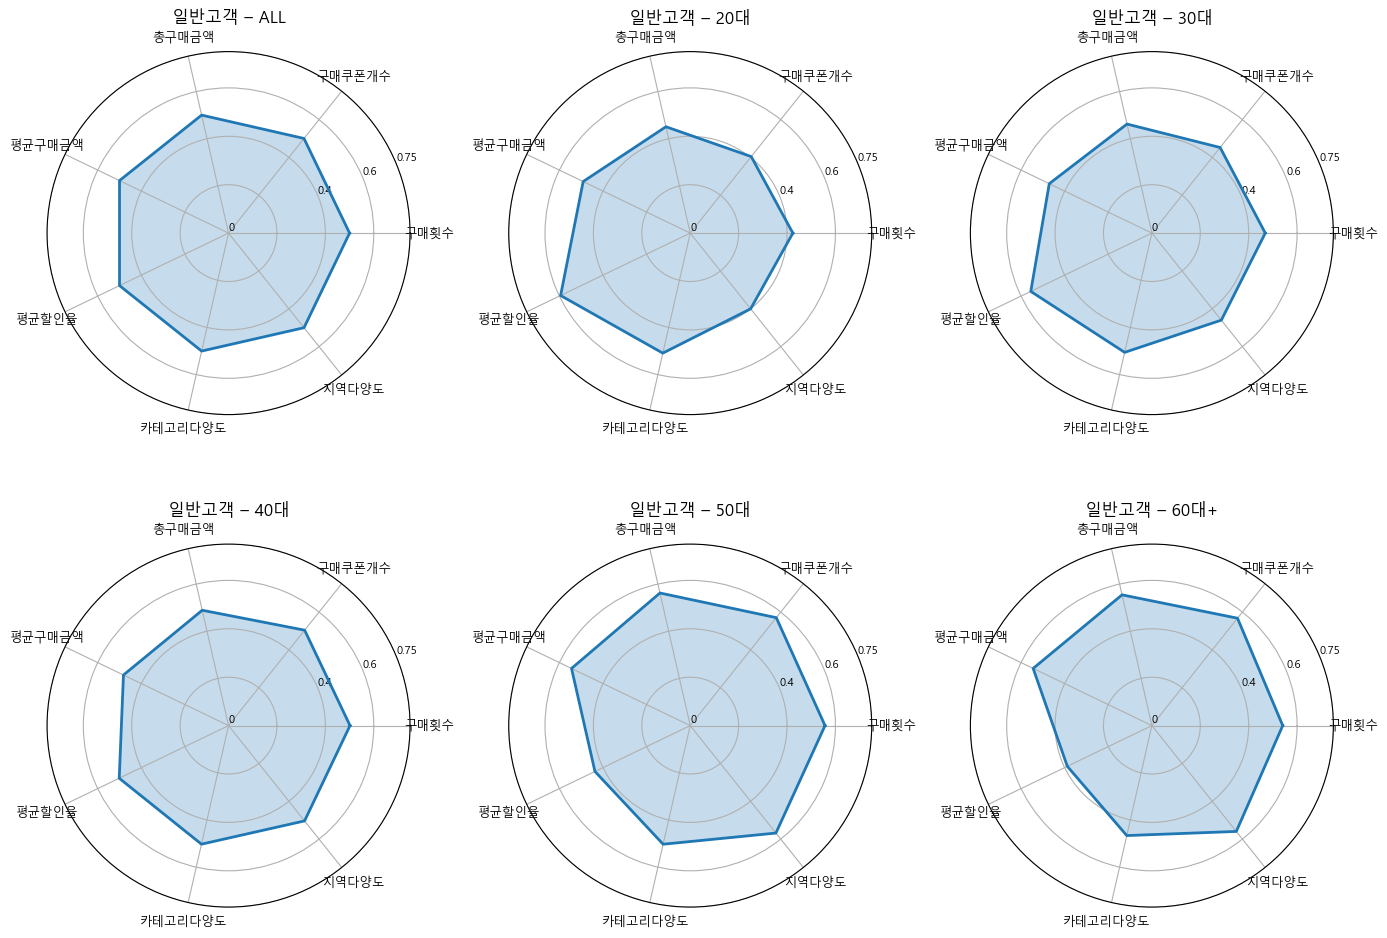

In [134]:
cols_medium = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

medium_rader = medium_df.copy()
medium_rader["AGE_GROUP2"] = medium_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_medium:
    medium_rader[col + "_pct"] = medium_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_medium]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = medium_rader[cols_pct].mean().values
    else:
        radar_values = medium_rader[medium_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_medium, f"일반고객 – {group}")

plt.tight_layout()
plt.show()

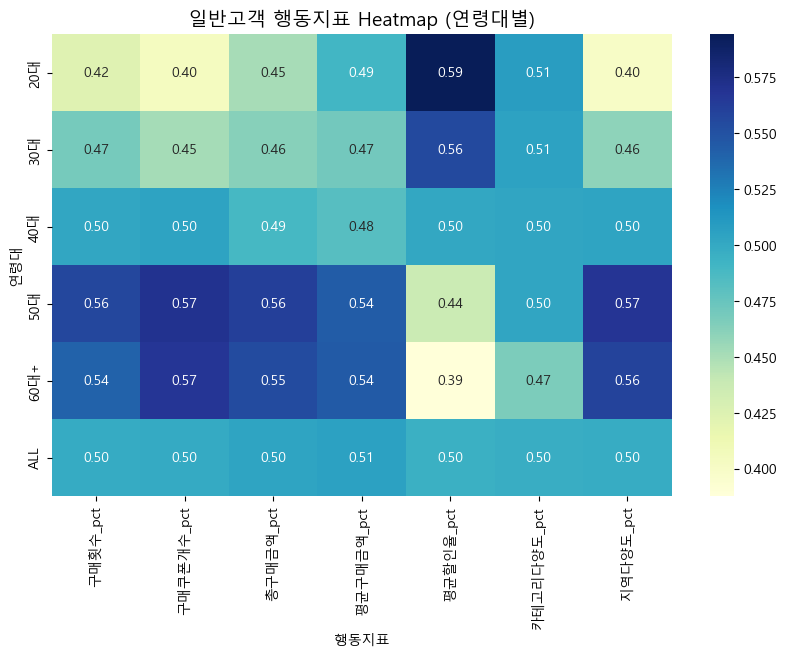

In [135]:
pivot = medium_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("일반고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 비활성고객 세그먼트 특징

In [176]:
low_df = rfm_df[rfm_df['고객등급']=='저활성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [177]:
low_df = low_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [178]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [180]:
low_purchase = low_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [181]:
low_purchase = low_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [182]:
low_purchase['GENRE_NAME'] = low_purchase['GENRE_NAME'].map(genre_en)
low_purchase['GENRE_NAME'].unique()

array(['Food', 'Gift card', 'Lesson', 'Other coupon',
       'Hotel and Japanese hotel', 'Leisure', 'Delivery service',
       'Hair salon', 'Nail and eye salon', 'Relaxation', 'Spa', 'Beauty',
       'Health and medical'], dtype=object)

In [183]:
low_purchase['small_area_name'] = low_purchase['small_area_name'].map(small_area_en)
low_purchase['small_area_name'].unique()

array(['Minami area', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji', 'Aichi',
       'Ginza / Shimbashi / Tokyo / Ueno', 'Fukuoka', 'Shizuoka',
       'Yokohama', 'Akasaka / Roppongi / Azabu',
       'Ebisu / Meguro / Shinagawa', 'Nara', 'Kita', 'Hyogo', 'Oita',
       'Kumamoto', 'Kawasaki / Shonan / Hakone', 'Niigata', 'Chiba',
       'Miyagi', 'Saitama', 'Hiroshima', 'Kagawa', 'Ishikawa', 'Nagasaki',
       'Ikebukuro / Kagurazaka / Akabane', 'Fukui',
       'Shibuya / Aoyama / Jiyugaoka', 'Okinawa',
       'Tachikawa / Machida / Hachioji', 'Okayama', 'Shiga', 'Yamaguchi',
       'Kyoto', 'Mie', 'Shimane', 'Yamanashi', 'Gifu', 'Aomori', 'Gunma',
       'Yamagata', 'Tochigi', 'Kagoshima', 'Miyazaki', 'Kochi',
       'Tokushima', 'Toyama', 'Wakayama', 'Nagano', 'Fukushima', 'Ehime',
       'Akita', 'Saga', 'Ibaraki', 'Tottori', 'Iwate'], dtype=object)

In [184]:
low_purchase['I_DATE'].dtype

dtype('O')

In [185]:
low_purchase['I_DATE'] = pd.to_datetime(low_purchase['I_DATE'])
low_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 비활성고객 연령별 카테고리 구성비중
* 이 세그먼트 고객 중 몇 %가 이 카테고리를 1번이라도 사용했는가?  
  -> 고객들이 어떤 카테고리에 “관심”이 있는지  
* 거래량 & 금액 기준 카테고리 사용률: 실제로 어떤 카테고리에서 돈이 나오는지

In [186]:
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [187]:
low_purchase.sample(3).T

,11287,18759,22586
USER_ID_hash,5760bba7963449bf8e631dda2f556f1b,91f63957d5bbb8fc2a77833f0f25d50d,afe427027727eae5a1f5754a9f45b0c5
Recency,310,346,214
Frequency,2,2,8
Monetary,3480,1995,15280
고객등급,저활성고객,저활성고객,저활성고객
ITEM_COUNT,1,1,1
I_DATE,2011-08-19 00:00:00,2011-07-07 00:00:00,2011-07-07 00:00:00
COUPON_ID_hash,a915558b6c3569a26799d25d2c7de697,39c215bfdebc9c2e945d4f63cb25a58d,f30ab902792b5d7890e5cb4a35149963
PURCHASEID_hash,a9bd14e1f660ee94561d8b3d8e6ca739,712c2f3c89bfbff38363c7b6132de0fa,897b2fc6d01c34458cd97e97039101f4
GENRE_NAME,Delivery service,Gift card,Gift card


In [188]:
# AGE_GROUP join (연령 정보 추가)
low_purchase = low_purchase.merge(
    df_user[['USER_ID_hash', 'AGE']],
    on='USER_ID_hash',
    how='left'
)
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [189]:
low_purchase['AGE_GROUP'] = (low_purchase['AGE']//10)*10

In [190]:
low_purchase.sample(3).T

,6435,30545,13831
USER_ID_hash,32dc332c64fa7a276a874ac1fdaeb8e5,f0cd137526f55e1ac7d559d93a95223f,6ae7811a9c7c58546d6a1567ab098c21
Recency,191,136,34
Frequency,2,19,5
Monetary,9960,30560,4881
고객등급,저활성고객,저활성고객,저활성고객
ITEM_COUNT,2,1,1
I_DATE,2011-12-16 00:00:00,2011-11-20 00:00:00,2011-08-13 00:00:00
COUPON_ID_hash,b922ca5e3a60d0029015490073d31a35,541de3404364a659db2748597be02090,b10286eddc539ab67efa87503e935dd9
PURCHASEID_hash,4d9e8894b67975aa33f41d1f445e0c87,e90acefb6c0e66622dc83e9c9cde967a,f954c1b4a85556478f5c181716b1b6b3
GENRE_NAME,Hotel and Japanese hotel,Delivery service,Gift card


In [201]:
# 사용자 기반(User-based) 연령대별 카테고리 관심도 (1번이상  구매)
low_user_category = (
    low_purchase.groupby(['AGE_GROUP', 'USER_ID_hash', 'GENRE_NAME'])['PURCHASEID_hash']
        .nunique()
        .reset_index()
)

low_user_category['used'] = 1

# pivot → 연령대 × 카테고리 (사용자 비율)
low_user_category_interest = (
    low_user_category
        .pivot_table(index=['AGE_GROUP', 'USER_ID_hash'],
                     columns='GENRE_NAME',
                     values='used',
                     fill_value=0)
        .groupby(level=0)  # AGE_GROUP 단위로 묶기
        .mean()            # 사용자 평균 → 사용자 비율(User %)
        .sort_index()
)

In [202]:
print("1번이상 구매한 카테고리들")
low_user_category_interest.loc[50].sort_values(ascending=False)

1번이상 구매한 카테고리들


GENRE_NAME
Delivery service            0.610624
Other coupon                0.334795
Food                        0.237817
Gift card                   0.201267
Hotel and Japanese hotel    0.170565
Leisure                     0.115010
Hair salon                  0.026316
Lesson                      0.024854
Relaxation                  0.024854
Spa                         0.013158
Nail and eye salon          0.008285
Beauty                      0.000975
Health and medical          0.000000
Name: 50, dtype: float64

In [205]:
low_user_category_volume = (
    low_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASEID_hash']
                .nunique()   # 구매 건수 기준
                .groupby(level=0)
                .apply(lambda x: x / x.sum())   # 연령대별 정규화
)

In [206]:
print("구매량 기준 카테고리 정렬")
low_user_category_volume.loc[50].sort_values(ascending=False)

구매량 기준 카테고리 정렬


AGE_GROUP  GENRE_NAME              
50         Delivery service            0.394195
           Other coupon                0.166605
           Food                        0.163483
           Hotel and Japanese hotel    0.092579
           Gift card                   0.083946
           Leisure                     0.052902
           Relaxation                  0.013042
           Hair salon                  0.012858
           Lesson                      0.010287
           Spa                         0.005511
           Nail and eye salon          0.004225
           Beauty                      0.000367
Name: PURCHASEID_hash, dtype: float64

In [207]:
low_user_category_revenue = (
    low_purchase.groupby(['AGE_GROUP', 'GENRE_NAME'])['PURCHASE_PRICE']
        .sum()
        .reset_index()
)

In [210]:
low_revenue_share = (
    low_user_category_revenue
        .groupby('AGE_GROUP')
        .apply(lambda x: x.set_index('GENRE_NAME')['PURCHASE_PRICE'] /
                        x['PURCHASE_PRICE'].sum())
        .unstack()
        .fillna(0)
)

In [211]:
print("사용금액 기준 카테고리 정렬")
low_revenue_share.loc[50].sort_values(ascending=False)

사용금액 기준 카테고리 정렬


GENRE_NAME
Delivery service            0.374764
Hotel and Japanese hotel    0.250298
Lesson                      0.102571
Food                        0.099523
Other coupon                0.060029
Hair salon                  0.028633
Leisure                     0.021386
Gift card                   0.020172
Spa                         0.019395
Relaxation                  0.014328
Nail and eye salon          0.008549
Beauty                      0.000351
Health and medical          0.000000
Name: 50, dtype: float64

### 비활성고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [145]:
low_metrics = get_purchase_metrics(low_purchase)
low_metrics.sample(3).T

,4016,12793,9527
USER_ID_hash,4e234ed7c382a34d55854ec42343d6a8,f9523bc90547eb9c70cb129ebde4e1cf,b827d8b5631931b1b6e65a6bd6471f40
구매횟수,1,3,1
구매쿠폰개수,2,3,1
총구매금액,1150,5775,9540
평균구매금액,1150.0,1925.0,9540.0
평균할인율,50.0,71.666667,61.0
카테고리다양도,1,2,1
지역다양도,1,3,1
재구매주기,NaN,0.0,NaN


In [146]:
low_metrics[low_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(low_metrics)

In [147]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [148]:
low_df = low_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [149]:
low_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
2301,2c3820c7d3ac196ec40410bf01e4ac43,83,1,6800,저활성고객,f,51
5515,6a6a96a9cb026938bf626a41568f22d3,273,2,1200,저활성고객,m,39
10870,d310d96f3ab2d1eb586ee35a68dfd481,154,3,40078,저활성고객,f,40


In [150]:
low_df = low_df.merge(low_metrics, on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [151]:
low_df.sample(3).T

,9043,10372,13037
USER_ID_hash,aedaf1d4389c6b219ea39b77996fa056,c9000f7405ec93519a4428b55fe1528e,fea81f1e56da11c09a91ab30cbaa4f13
Recency,88,108,287
Frequency,2,1,1
Monetary,3530,1400,3281
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,m,f,f
AGE,41,36,47
구매횟수,2,1,1
구매쿠폰개수,2,2,2
총구매금액,3530,1400,3281


In [152]:
low_df['AGE_GROUP'] = (low_df['AGE']//10)*10
low_df.sample(3).T

,2545,12262,449
USER_ID_hash,316237d1d53679888581597c2886aea8,ef1421b3225613b72f9e760b99bb2076,0937e4e24b0eca8cb726e9182a47669b
Recency,144,322,323
Frequency,1,1,2
Monetary,2440,2500,2000
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,f,m,m
AGE,27,58,44
구매횟수,1,1,2
구매쿠폰개수,2,1,2
총구매금액,2440,2500,2000


In [153]:
low_df["AGE_GROUP"].value_counts()

AGE_GROUP
30    4281
40    3488
20    2133
50    2052
60     899
70     193
10      57
80      10
Name: count, dtype: int64

In [154]:
low_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
10,2.33,2.77,3867.07,1824.74,60.51,1.68,32.83
20,2.39,3.09,10220.84,5099.02,63.64,1.78,41.80
30,2.43,3.14,9490.17,4518.61,62.94,1.76,41.49
40,2.48,3.42,9321.56,4317.30,62.07,1.73,40.31
50,2.65,3.79,10496.73,4395.84,62.42,1.77,39.95
60,2.66,3.96,10066.64,4142.95,60.35,1.74,39.26
70,2.21,3.05,6881.02,3260.86,60.59,1.60,40.05
80,1.60,2.20,1748.20,1131.27,56.22,1.30,22.75


### 비활성고객 분석 시각화
1. Rader Chart
2. Heat Map

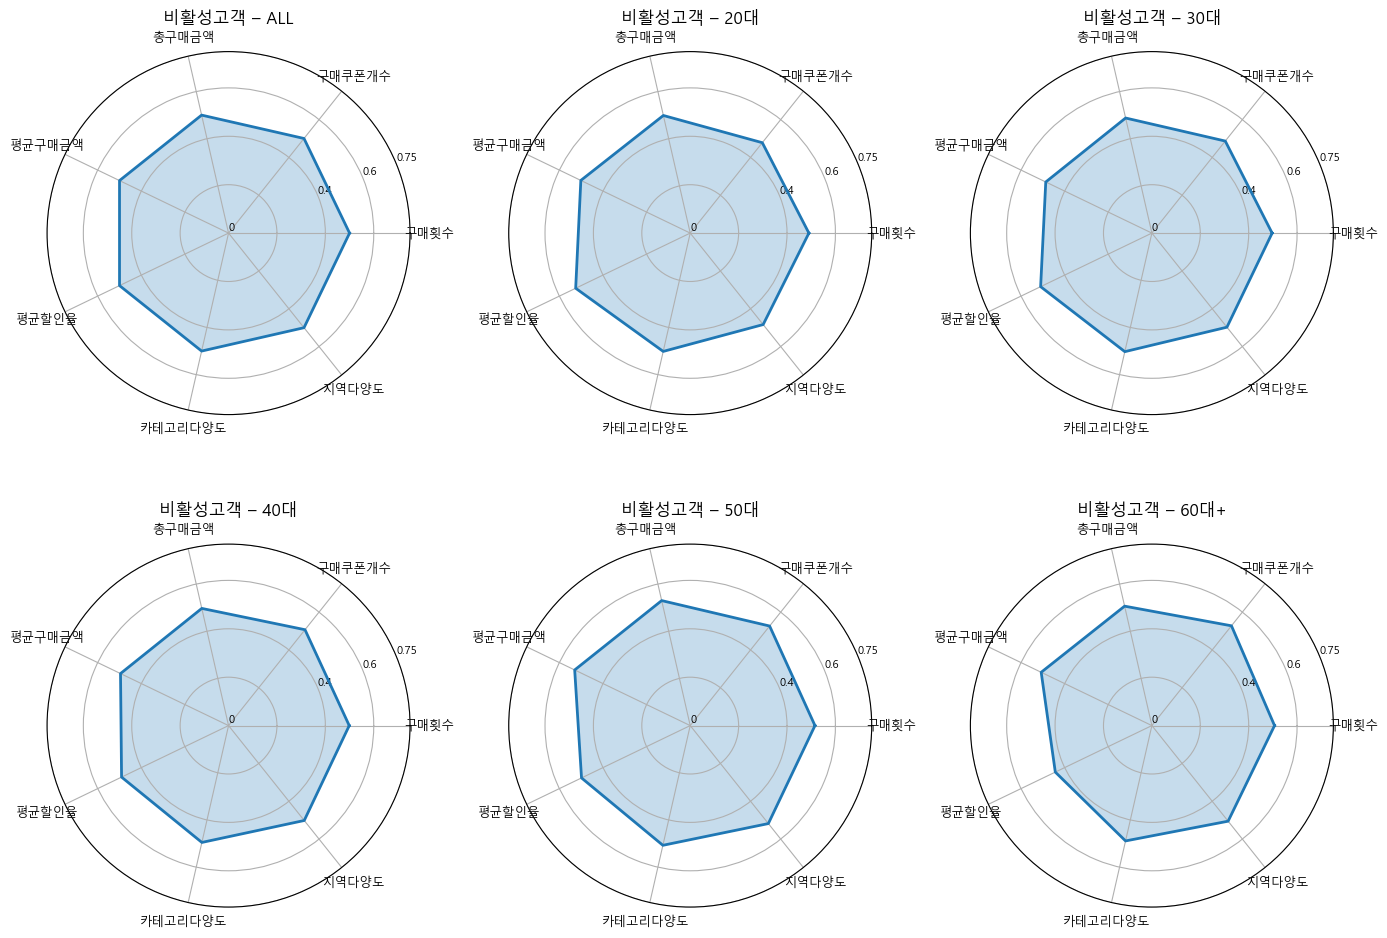

In [155]:
cols_low = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

low_rader = low_df.copy()
low_rader["AGE_GROUP2"] = low_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_low:
    low_rader[col + "_pct"] = low_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_low]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = low_rader[cols_pct].mean().values
    else:
        radar_values = low_rader[low_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_low, f"비활성고객 – {group}")

plt.tight_layout()
plt.show()

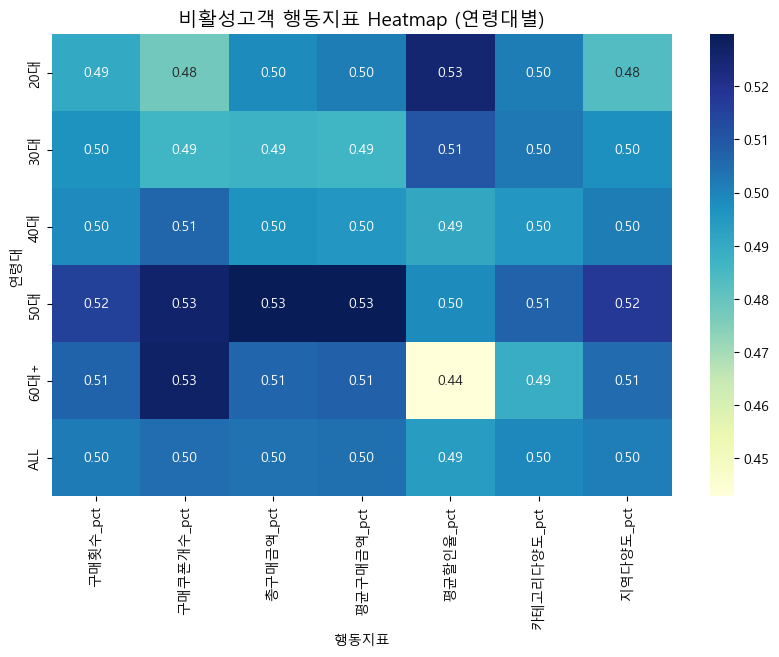

In [156]:
pivot = low_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("비활성고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 세그먼트별 전체 비교

In [157]:
vip_rader["고객등급"] = "VIP"
medium_rader["고객등급"] = "일반고객"
low_rader["고객등급"] = "저활성고객"

all_rader=  pd.concat([vip_rader, medium_rader, low_rader], axis=0, ignore_index=True)

In [158]:
all_rader.sample(3).T

,3936,18388,1331
USER_ID_hash,64e879a55a00672264e40afcb663a2fb,a8a38623d0ef90a2804d3d52364b86c1,1b41599d931d0455f2feec5827a1b08e
Recency,44,96,7
Frequency,8,3,14
Monetary,62520,9545,92920
고객등급,일반고객,저활성고객,일반고객
SEX_ID,m,m,m
AGE,65,36,39
구매횟수,8,3,14
구매쿠폰개수,9,4,24
총구매금액,62520,9545,92920


In [159]:
cols_pct = [c+"_pct" for c in cols_low]
all_rader.drop(columns=cols_pct, axis=1, errors='ignore', inplace=True)
all_rader.sample(3).T

,22731,14856,7924
USER_ID_hash,ff12d23336c0515a0833eaeb46a2df12,641e2c4858c4929df0e1cc15e58d9427,cfbf05ba31845881997d7e602b9a6b1c
Recency,229,276,5
Frequency,1,1,15
Monetary,7245,13820,13110
고객등급,저활성고객,저활성고객,일반고객
SEX_ID,f,m,f
AGE,45,27,29
구매횟수,1,1,15
구매쿠폰개수,1,1,15
총구매금액,7245,13820,13110


In [161]:
cols_all = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

for col in cols_all:
    all_rader[col + "_pct"] = all_rader[col].rank(pct=True)

all_rader.sample(3).T

,17702,14418,15216
USER_ID_hash,9aebb15005dcddc411ac7687c142067c,5b79671799af6c3b2deec0415e959c15,6b1318cb067f23dfa581be2e8ee1e00c
Recency,107,168,76
Frequency,1,7,3
Monetary,2520,16028,6420
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,m,f,m
AGE,44,57,61
구매횟수,1,7,3
구매쿠폰개수,2,10,3
총구매금액,2520,16028,6420


In [162]:
all_pivot = all_rader.groupby("고객등급")[cols_pct].mean()
all_pivot

,구매횟수_pct,구매쿠폰개수_pct,총구매금액_pct,평균구매금액_pct,평균할인율_pct,카테고리다양도_pct,지역다양도_pct
고객등급,,,,,,,
VIP,0.988397,0.982751,0.974770,0.680629,0.430933,0.882081,0.953518
일반고객,0.724726,0.717615,0.685770,0.563216,0.542354,0.693708,0.708430
저활성고객,0.327256,0.332460,0.355301,0.450274,0.471799,0.352149,0.339771


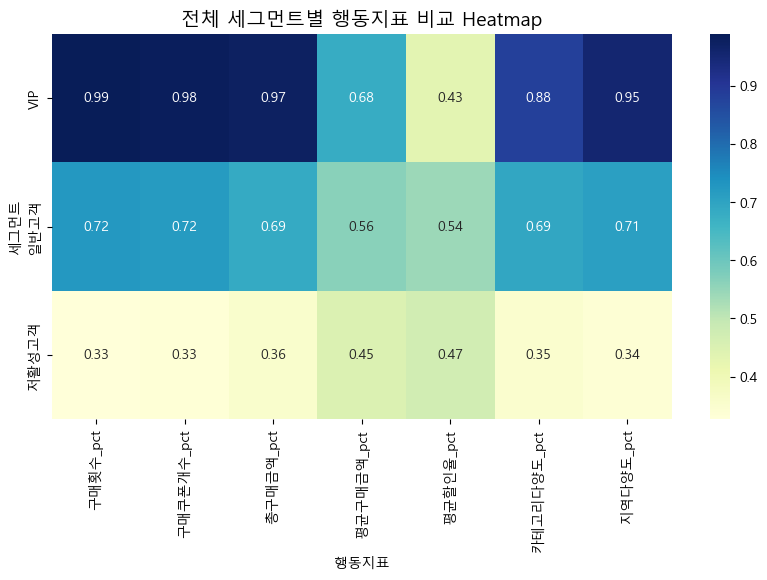

In [163]:
plt.figure(figsize=(10,5))
sns.heatmap(all_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("전체 세그먼트별 행동지표 비교 Heatmap", fontsize=14)
plt.xlabel("행동지표")
plt.ylabel("세그먼트")
plt.show()

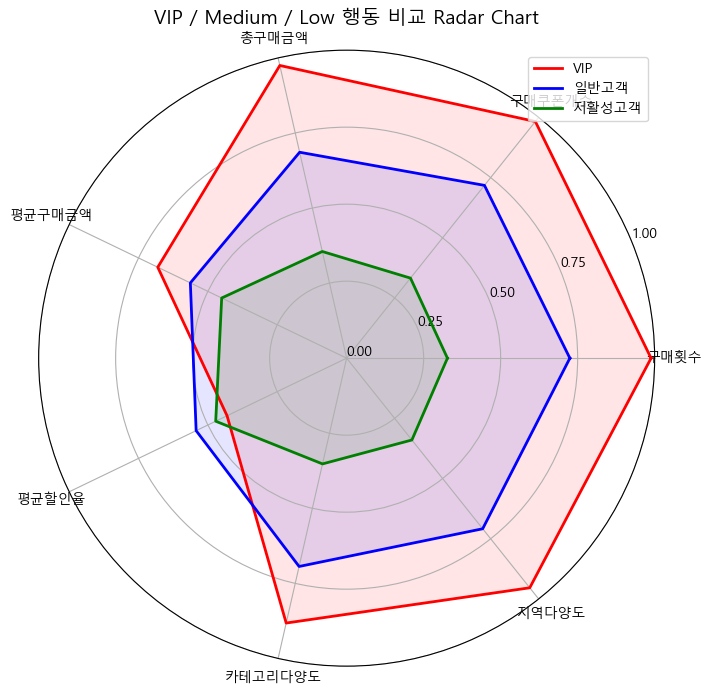

In [166]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# 값
angles = np.linspace(0, 2*np.pi, len(cols_all), endpoint=False).tolist()
angles += angles[:1]

# 범위 고정
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

for seg, color in zip(["VIP", "일반고객", "저활성고객"], ["red", "blue", "green"]):
    values = all_pivot.loc[seg].values
    values = np.concatenate((values, [values[0]]))

    ax.plot(angles, values, linewidth=2, label=seg, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols_all, fontsize=10)
plt.legend(loc="upper right")
plt.title("VIP / Medium / Low 행동 비교 Radar Chart", fontsize=14)
plt.show()
